# Predicting Vehicle Prices Using Regression Models

## **Objectives**  
The primary goal of this project is to develop a robust regression model to predict used car prices for a reseller based on various listed features and specifications. In addition to predicting prices, the project focuses on identifying feature importance and mitigating overfitting through the application of regularisation techniques.

There can be several business objectives for this, such as:

* **Price Prediction**: Model car prices based on features like mileage, fuel type, and performance.
* **Market Analysis**: Explore trends and preferences in the used car market, by type, region, or other metrics.
* **Feature Importance**: Identify the most important factors influencing car prices (e.g., fuel type, mileage, age).

### **Tasks Overview**
The data pipeline for this task involves the following steps:  
1. **Dataset Overview**   
2. **Data Preprocessing**
3. **Data Visualisation & Exploration**
4. **Model Building**
3. **Regularisation**

## **1 Data Understanding**

| **Variable** | **Description** |
--------|--------------|
| `make_model` | The brand and model of the vehicle (e.g., 'Audi A1'). |
| `body_type` | The body style of the vehicle, such as Sedan, Compact, or Station Wagon. |
| `price`  | The listed price of the car in currency. |
| `vat`  | Indicates the VAT status for the vehicle's price (e.g., VAT deductible, Price negotiable). |
| `km` | The total mileage (in kilometers) of the vehicle, indicating its usage. |
| `Type` | Condition of the vehicle, whether it's 'Used' or 'New'.|
| `Fuel` | Type of fuel the vehicle uses, such as 'Diesel', 'Benzine', etc. |
| `Gears` | The number of gears in the vehicle's transmission. |
| `Comfort_Convenience` | Comfort and convenience features, such as 'Air conditioning', 'Leather steering wheel', 'Cruise control', and more. |
| `Entertainment_Media` | Media features available in the vehicle, including 'Bluetooth', 'MP3', 'Radio', etc. |
| `Extras` | Additional features like 'Alloy wheels', 'Sport suspension', etc.|
| `Safety_Security` | Safety features like 'ABS', 'Airbags', 'Electronic stability control', 'Isofix', etc.  |
| `age` | Age of the car (calculated based on the model year). |
| `Previous_Owners`| The number of previous owners the car has had. |
| `hp_kW` | Engine power in kilowatts (kW), indicating the performance capacity of the engine.|
| `Inspection_new` | Indicates whether the car has recently undergone an inspection (1 for yes, 0 for no). |
| `Paint_Type`| The type of paint on the car, such as 'Metallic', 'Matte', etc. |
| `Upholstery_type` | The material used for the interior upholstery, such as 'Cloth', 'Leather', etc.|
| `Gearing_Type` | The type of transmission the car uses, either 'Automatic' or 'Manual'. |
| `Displacement_cc` | The engine displacement in cubic centimeters (cc), indicating the size of the engine.|
| `Weight_kg` | The total weight of the vehicle in kilograms.|
| `Drive_chain` | The type of drivetrain, indicating whether it's 'Front' or 'Rear' wheel drive. |
| `cons_comb`  | The combined fuel consumption in liters per 100 kilometers.|

### **1.1 Data Loading**

**Importing Necessary Libraries**

In [463]:
# Define local and AWS environment variables
local = 1
aws = 0

if local:
    base_path = "/Users/aditikulkarni/Documents/Masters/AI-Projects/04-ML-Models/linear-regression/"
    raw_data = base_path + "data/raw/"
    processed_data = base_path + "data/processed/"
    models = base_path + "models/"

if aws:
    base_path = "s3://ml-data-masters/04-ML-Models/linear-regression/"
    raw_data = base_path + "data/raw/"
    processed_data = base_path + "data/processed/"
    models = base_path + "models/"

In [464]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_regression

import statsmodels.formula.api as sm  # API for statsmodels

from IPython.display import display
from collections import Counter
from pprint import pprint 

from warnings import filterwarnings
filterwarnings('ignore')


#### **1.1.1**
Load the dataset

In [465]:
# Load the data
df_raw = pd.read_csv(raw_data + "Car_Price_data.csv")
df_raw.head()


make_model body_type  price               vat       km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible  56013.0  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable  80000.0  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible  83450.0  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible  73000.0  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible  16200.0  Used   Diesel   

   Gears                                Comfort_Convenience  \
0    7.0  Air conditioning,Armrest,Automatic climate con...   
1    7.0  Air conditioning,Automatic climate control,Hil...   
2    7.0  Air conditioning,Cruise control,Electrical sid...   
3    6.0  Air suspension,Armrest,Auxiliary heating,Elect...   
4    7.0  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  ... Previous_Owners  \
0  Bluetooth,Hands-free equipment,On-board comput...  ...             2.0   
1  Bluetooth,Hands-free equipment,On-board comput...  ...             1.0   
2                              MP3,On-board computer  ...             1.0   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...  ...             1.0   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...  ...             1.0   

   hp_kW  Inspection_new  Paint_Type  Upholstery_type  Gearing_Type  \
0   66.0               1    Metallic            Cloth     Automatic   
1  141.0               0    Metallic            Cloth     Automatic   
2   85.0               0    Metallic            Cloth     Automatic   
3   66.0               0    Metallic            Cloth     Automatic   
4   66.0               1    Metallic            Cloth     Automatic   

  Displacement_cc Weight_kg Drive_chain  cons_comb  
0          1422.0    1220.0       front        3.8  
1          1798.0    1255.0       front        5.6  
2          1598.0    1135.0       front        3.8  
3          1422.0    1195.0       front        3.8  
4          1422.0    1135.0       front        4.1  

[5 rows x 23 columns]

In [466]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

## **2 Analysis and Feature Engineering** <font color =red> [35 marks] </font>



### **2.1 Preliminary Analysis and Frequency Distributions** <font color = red> [13 marks] </font>

#### **2.1.1** <font color =red> [1 marks] </font>
Check and fix missing values.

In [467]:
# Standardize column names by converting to lowercase and replacing spaces with underscores
df_raw.columns = df_raw.columns.str.lower().str.replace(' ', '_')

**From the features, identify the target feature and numerical and categorical predictors. Select the numerical and categorical features carefully as they will be used in analysis.**

In [470]:
# Define categorical and numeric predictor columns

cat_columns = [
    'make_model', 'body_type', 'vat', 'type', 'fuel',
    'comfort_convenience', 'entertainment_media', 'extras', 'safety_security',
    'paint_type', 'upholstery_type',
    'gearing_type', 'drive_chain'
]

num_columns = [
    'km', 'gears', 'previous_owners', 'hp_kw', 'displacement_cc',
    'weight_kg', 'cons_comb',
    'age', 'inspection_new'
]

# Further categorize numerical predictor columns based on imputation strategy
num_median_columns = ['km', 'age']
num_mode_columns = ['gears', 'previous_owners', 'inspection_new']
num_mean_columns = ['hp_kw','weight_kg', 'cons_comb', 'displacement_cc']

# Define feature and target columns
target_column = ['price']
feature_columns = [col for col in df_raw.columns if col != 'price'] 

**Categorical Columns Imputation Strategy**
- Use mode for all

**Numeric Columns Imputation Strategy**

If target column has missing values, better to drop the rows as imputing target variable can lead to bias

For other columns, follow below strategy:
- price → median (target variable, drop if few missing, but if you need imputation, prices are skewed → median safer than mean)
- km → median (mileage usually skewed, better than mean)
- Gears → mode (discrete small integers, categorical-like)
- age → median (skewed distribution possible, median more robust)
- Inspection_new → mode (binary categorical 0/1)
- Previous_Owners → mode (small integers, categorical-like)
- hp_kW → mean or median (engine power is continuous; if distribution is fairly symmetric → mean, otherwise median)
- Displacement_cc → mean (engine displacement usually continuous & symmetric within ranges)
- Weight_kg → mean (continuous, symmetric, less outlier-prone)
- cons_comb → mean (fuel consumption is continuous, usually normal-ish)

In [471]:
# Find the proportion of missing values in each column and handle if found

def handle_missing_values(df=df_raw):

    def analyze_missing_values(df):
        # Create a dataset with list of columns and their missing value proportions

        missingValues = {'column_name': df.columns,
                         'data_type': df.dtypes,
                         'missing_count': df.isnull().sum(),
                         'missing_percentage': df.isnull().mean() * 100}
        missing_values = pd.DataFrame(missingValues).sort_values(by='missing_percentage', ascending=False).reset_index(drop=True)

        conditions_for_impute = [
                        (missing_values['column_name'].isin(target_column)),
                        (missing_values['column_name'].isin(categorical_cols)),
                        (missing_values['column_name'].isin(num_median_columns)),
                        (missing_values['column_name'].isin(num_mean_columns)),
                        (missing_values['column_name'].isin(num_mode_columns))
                    ]
        choices_for_impute = ['drop', 'mode', 'median', 'mean', 'mode']
        missing_values['impute_type'] = np.select(conditions_for_impute, choices_for_impute, default='unknown')

        conditions = [
                        (missing_values['impute_type'] == 'none'),
                        (missing_values['missing_percentage'] == 0),
                        (missing_values['missing_percentage'] > 0) & (missing_values['missing_percentage'] <= 5),
                        (missing_values['missing_percentage'] > 5) & (missing_values['missing_percentage'] <= 30),
                        (missing_values['missing_percentage'] > 30)
                    ]
        choices = ['none', 'none', 'drop', 'impute', 'drop']
        missing_values['action'] = np.select(conditions, choices, default='unknown') 

        return missing_values

    # Define categorical and numerical columns
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    #numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Analyse missing values and identify action
    missing_values = analyze_missing_values(df)
    display(missing_values)

    print(f"Strategy for handling missing values:")
    print(f"If target column has missing values, better to drop the rows as imputing target variable can lead to bias")
    print(f"For other columns, follow below strategy:")
    print(f"- Missing values percentage = 0% : No action needed")
    print(f"- Missing values percentage > 0% and <= 5% : Drop the column")
    print(f"- Missing values percentage > 5% and <= 30% : Impute missing values")
    print(f"- Missing values percentage > 30% : Check data source, likely drop the column")

    print(f"\nCategorical columns: {categorical_cols}")
    print(f"Numerical columns with median imputation: {num_median_columns}")
    print(f"Numerical columns with mean imputation: {num_mean_columns}")
    print(f"Numerical columns with mode imputation: {num_mode_columns}")

    # Handle missing values based on the action determined
    for index, row in missing_values.iterrows():
        col = row['column_name']
        action = row['action']

        if (col not in target_column) & (action == 'drop'):
            df.drop(columns=[col], inplace=True)
        elif action == 'impute':
            if col in num_median_columns:
                median_value = df[col].median()
                df[col].fillna(median_value, inplace=True)
            elif col in num_mean_columns:
                mean_value = df[col].mean()
                df[col].fillna(mean_value, inplace=True)
            elif col in categorical_cols:
                mode_value = df[col].mode()[0]
                df[col].fillna(mode_value, inplace=True)
        else:
            pass  # No action needed for 'none' or unknown actions

    return df

df_processed = handle_missing_values(df_raw)


column_name data_type  missing_count  missing_percentage  \
0            make_model    object              0                 0.0   
1                   age   float64              0                 0.0   
2           drive_chain    object              0                 0.0   
3             weight_kg   float64              0                 0.0   
4       displacement_cc   float64              0                 0.0   
5          gearing_type    object              0                 0.0   
6       upholstery_type    object              0                 0.0   
7            paint_type    object              0                 0.0   
8        inspection_new     int64              0                 0.0   
9                 hp_kw   float64              0                 0.0   
10      previous_owners   float64              0                 0.0   
11      safety_security    object              0                 0.0   
12            body_type    object              0                 0.0   
13               extras    object              0                 0.0   
14  entertainment_media    object              0                 0.0   
15  comfort_convenience    object              0                 0.0   
16                gears   float64              0                 0.0   
17                 fuel    object              0                 0.0   
18                 type    object              0                 0.0   
19                   km   float64              0                 0.0   
20                  vat    object              0                 0.0   
21                price     int64              0                 0.0   
22            cons_comb   float64              0                 0.0   

   impute_type action  
0         mode   none  
1       median   none  
2         mode   none  
3         mean   none  
4         mean   none  
5         mode   none  
6         mode   none  
7         mode   none  
8         mode   none  
9         mean   none  
10        mode   none  
11        mode   none  
12        mode   none  
13        mode   none  
14        mode   none  
15        mode   none  
16        mode   none  
17        mode   none  
18        mode   none  
19      median   none  
20        mode   none  
21        drop   none  
22        mean   none

Strategy for handling missing values:
If target column has missing values, better to drop the rows as imputing target variable can lead to bias
For other columns, follow below strategy:
- Missing values percentage = 0% : No action needed
- Missing values percentage > 0% and <= 5% : Drop the column
- Missing values percentage > 5% and <= 30% : Impute missing values
- Missing values percentage > 30% : Check data source, likely drop the column

Categorical columns: ['make_model', 'body_type', 'vat', 'type', 'fuel', 'comfort_convenience', 'entertainment_media', 'extras', 'safety_security', 'paint_type', 'upholstery_type', 'gearing_type', 'drive_chain']
Numerical columns with median imputation: ['km', 'age']
Numerical columns with mean imputation: ['hp_kw', 'weight_kg', 'cons_comb', 'displacement_cc']
Numerical columns with mode imputation: ['gears', 'previous_owners', 'inspection_new']


#### **2.1.2** <font color =red> [3 marks] </font>
Identify numerical predictors and plot their frequency distributions.

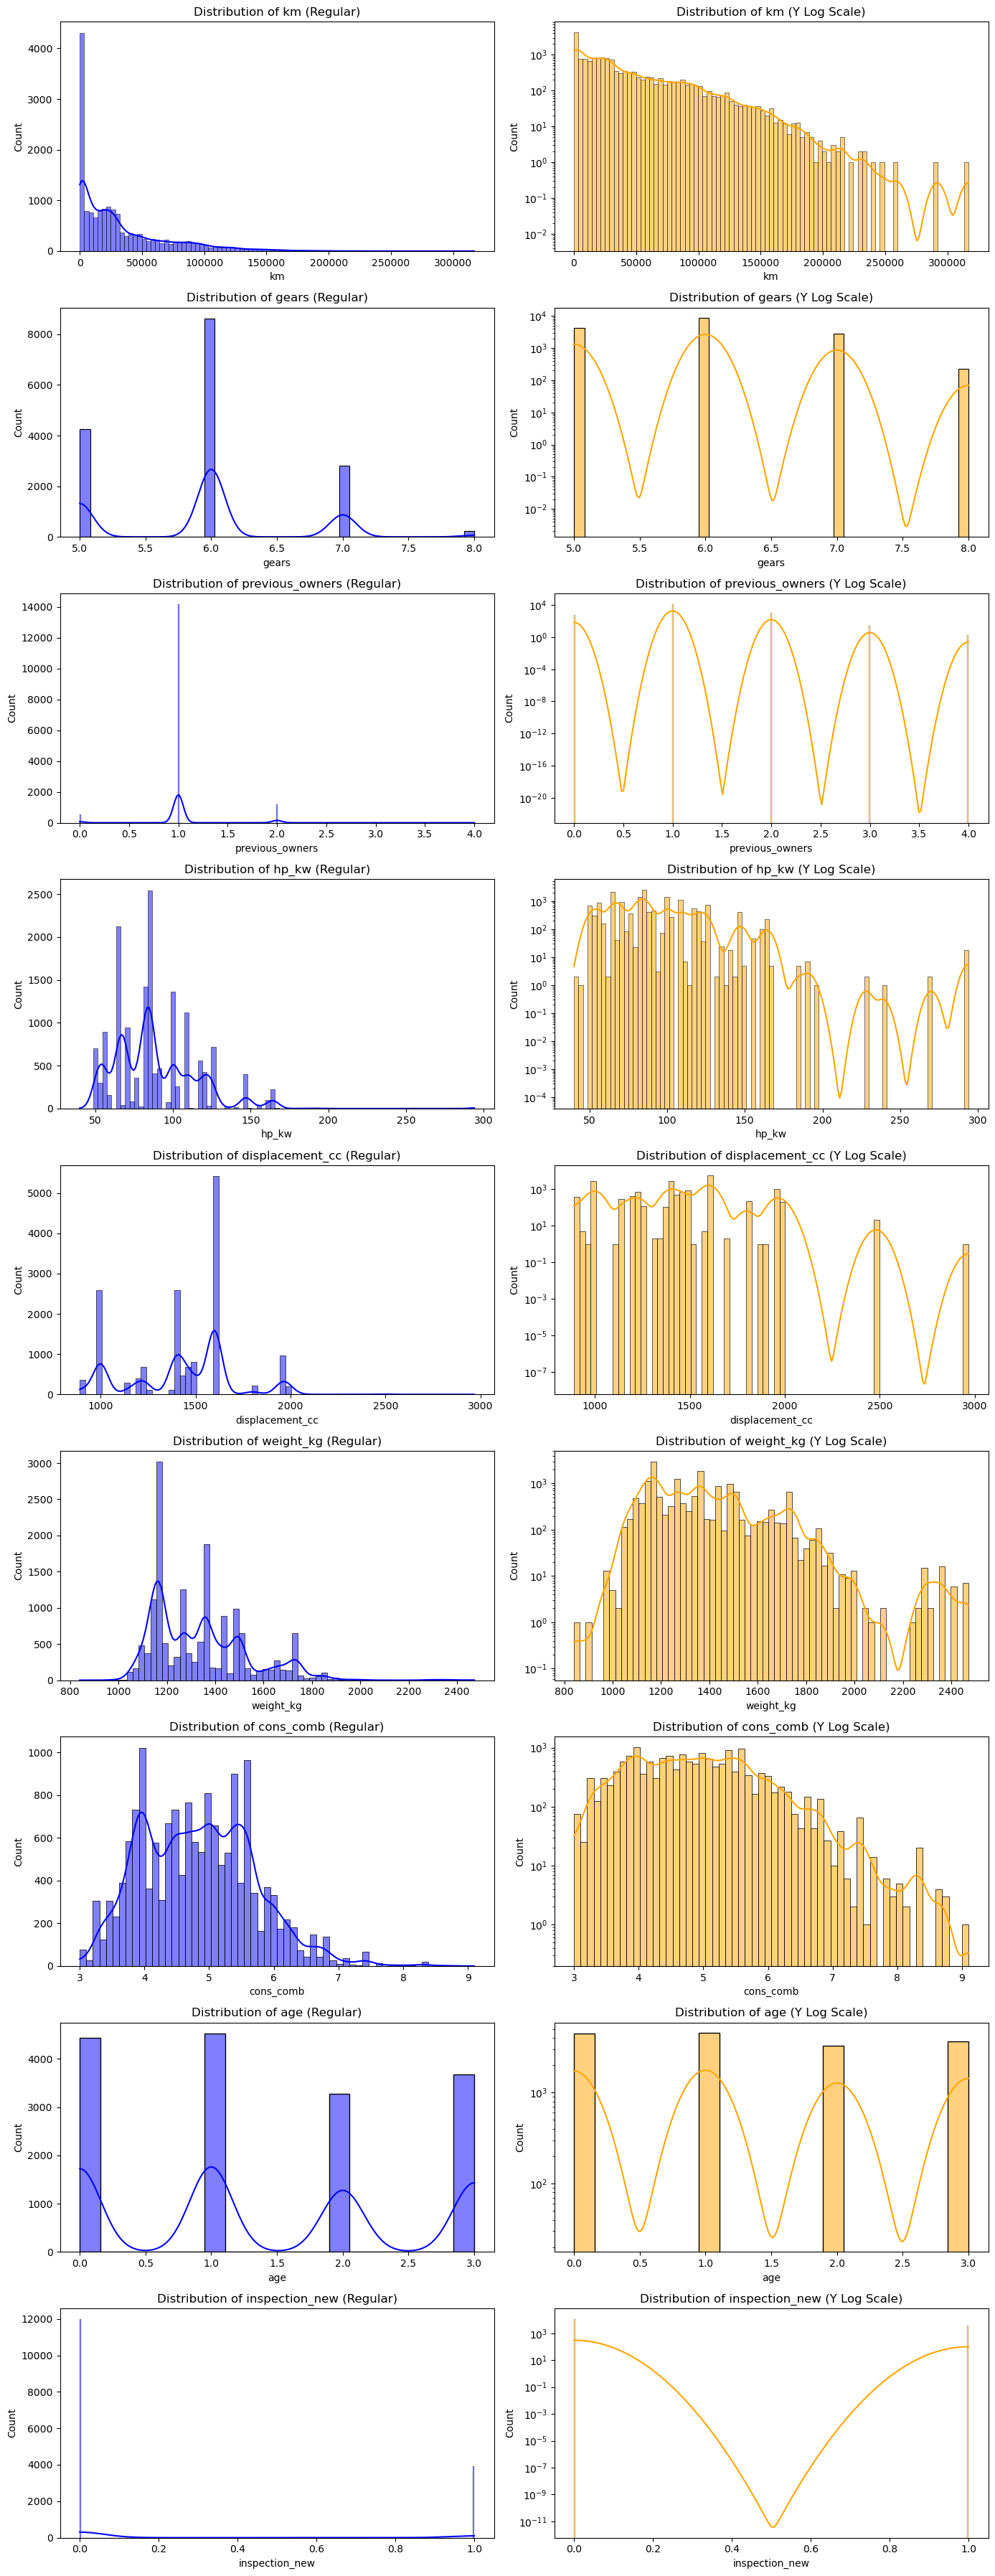

In [472]:
# Identify numerical features and plot histograms

# All numerical features are in num_columns list defined above

def plot_numerical_histograms(df, numerical_cols):
    n_cols = 2
    n_rows = len(numerical_cols)
    plt.figure(figsize=(14, n_rows * 4))

    for idx, col in enumerate(numerical_cols):
        # Regular scale
        plt.subplot(n_rows, n_cols, idx * 2 + 1)
        sns.histplot(df[col], kde=True, color='blue')
        plt.title(f"Distribution of {col} (Regular)")

        # Log scale (y-axis)
        plt.subplot(n_rows, n_cols, idx * 2 + 2)
        sns.histplot(df[col], kde=True, color='orange')
        plt.yscale('log')
        plt.title(f"Distribution of {col} (Y Log Scale)")

    plt.tight_layout()
    plt.show()

plot_numerical_histograms(df_processed, num_columns)


#### **2.1.3** <font color =red> [3 marks] </font>
Identify categorical predictors and plot their frequency distributions.

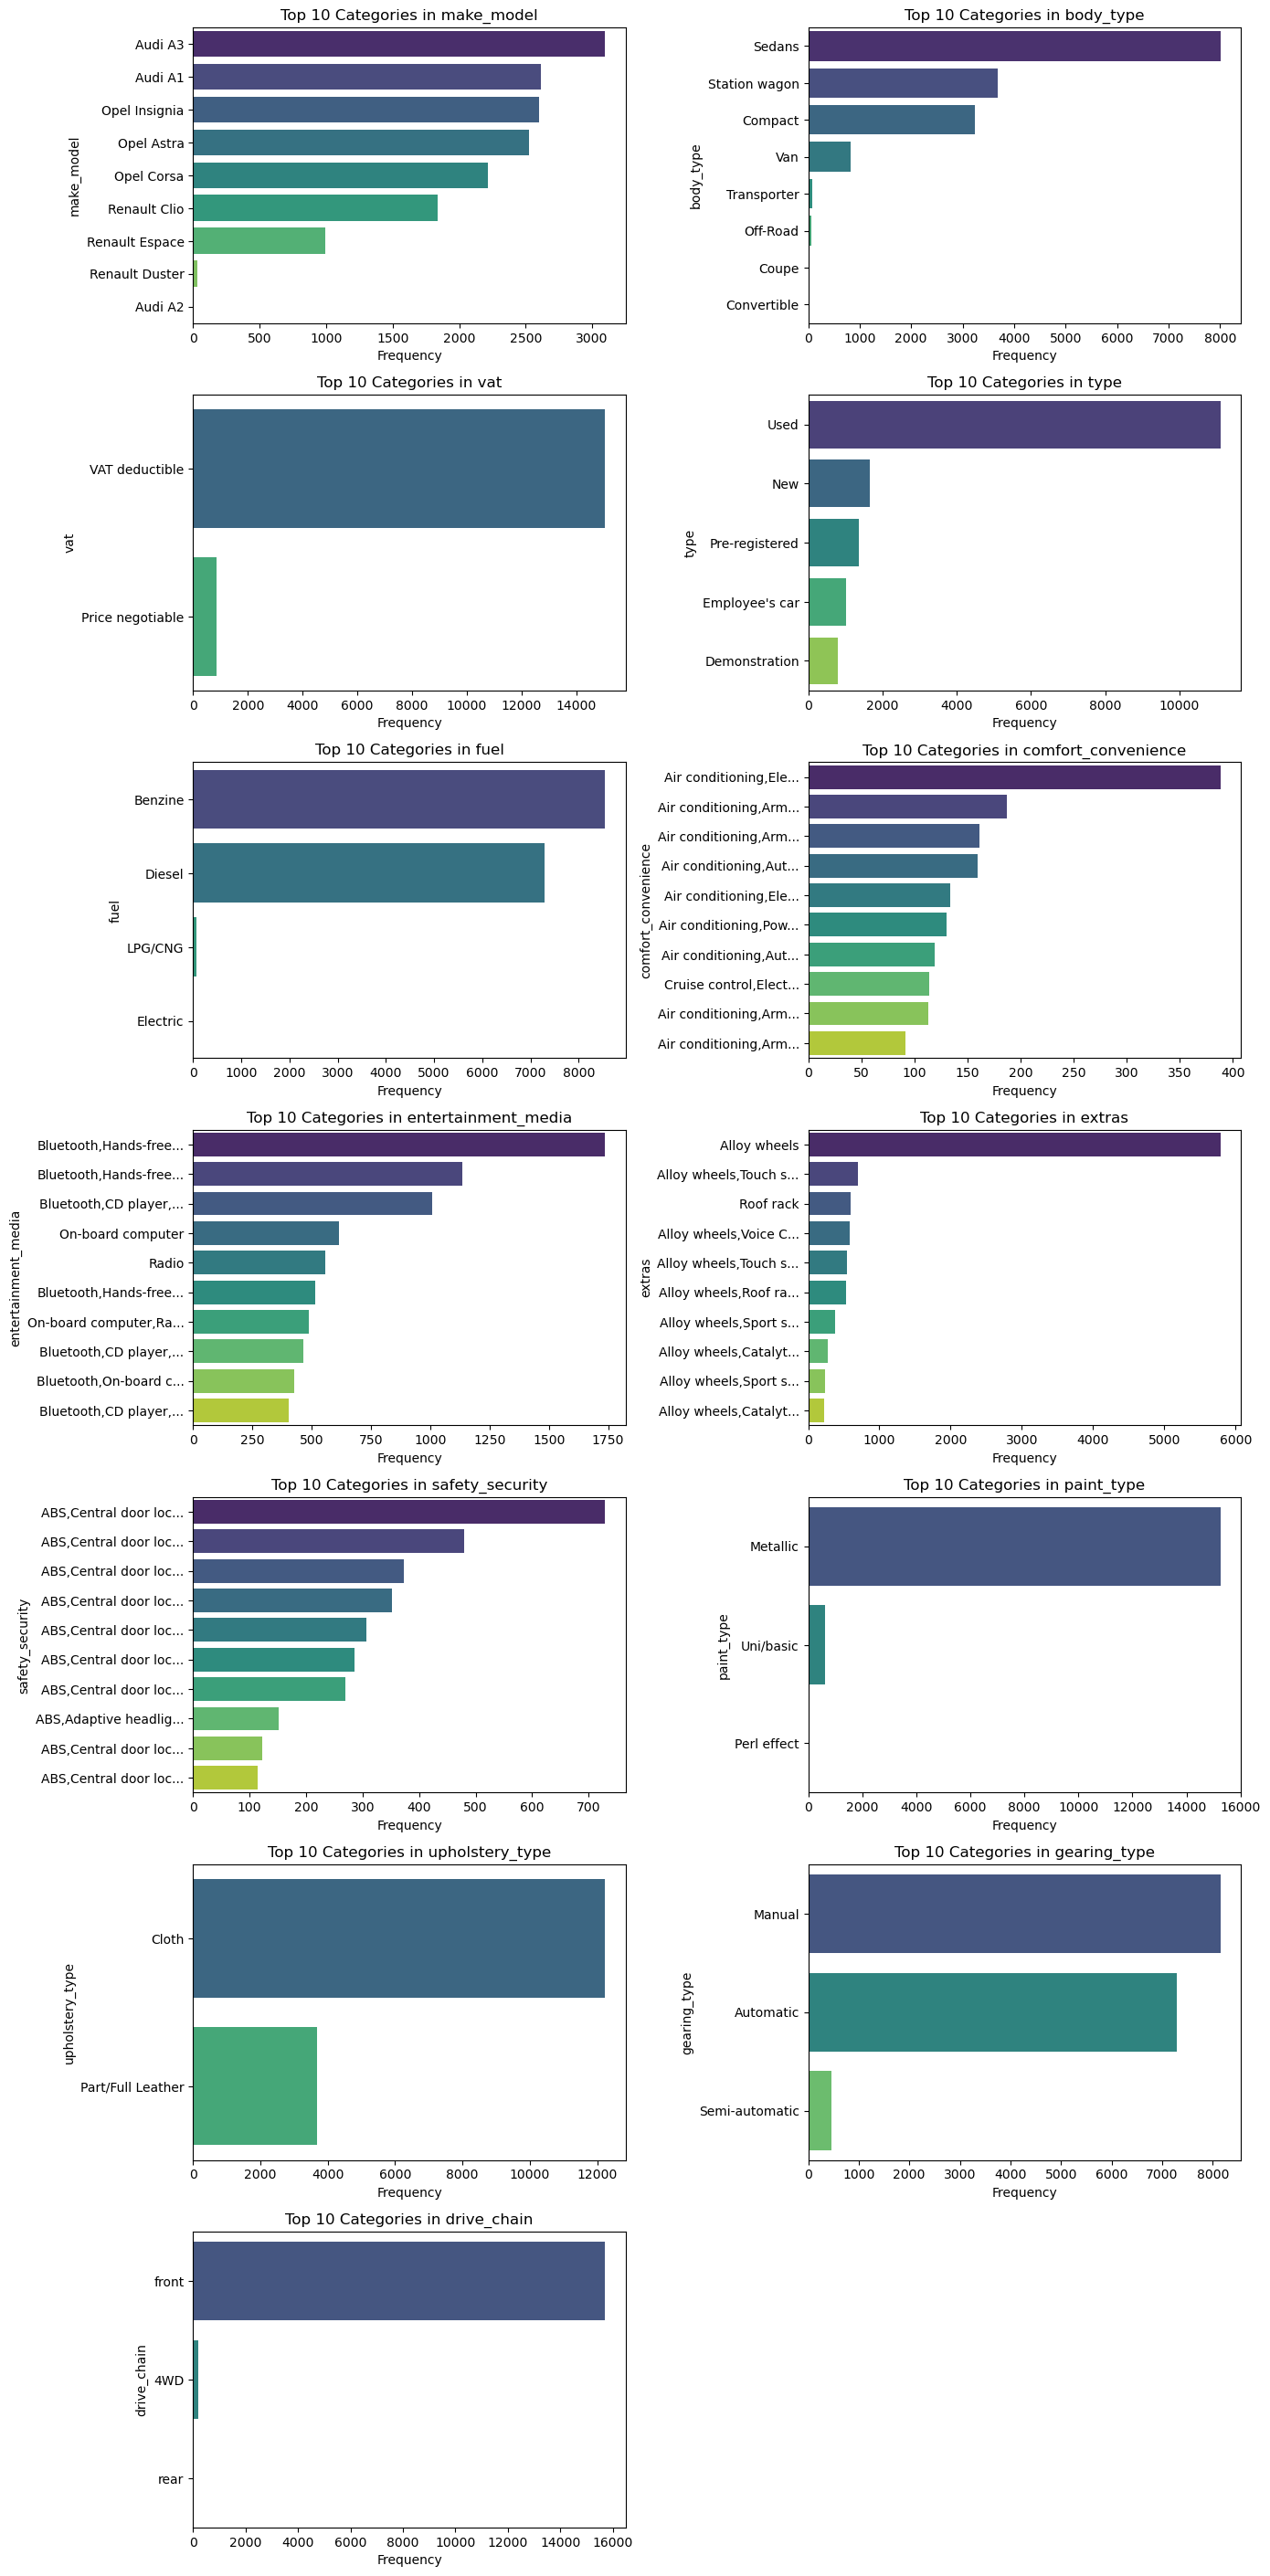

In [473]:
# Identify categorical columns and check their frequency distributions

# All categorical features are in cat_columns list defined above

def plot_categorical_frequencies(df, categorical_cols):
    n_cols = 2
    n_rows = len(categorical_cols)
    plt.figure(figsize=(14, n_rows * 4))

    for idx, col in enumerate(categorical_cols):
        plt.subplot(n_rows, n_cols, idx + 1)
        value_counts = df[col].value_counts().head(10)  # .head(10) for Top 10 categories
        sns.barplot(x=value_counts.values, y=value_counts.index, hue=value_counts.index, palette='viridis')
        plt.title(f"Top 10 Categories in {col}")
        plt.xlabel('Frequency')
        plt.ylabel(col)
        # Truncate y-tick labels to 20 characters (adjust as needed)
        plt.yticks(
            ticks=range(len(value_counts.index)),
            labels=[str(label)[:20] + ('...' if len(str(label)) > 20 else '') for label in value_counts.index]
        )

    plt.tight_layout()
    plt.show()

plot_categorical_frequencies(df_processed, cat_columns)

**Note**: Look carefully at the values stored in columns `["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]`.

Should they be considered categorical? Should they be dropped or handled any other way?

The columns `["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]` are all categorical columns with multiple discrete values in comma separated format in each cell. These will be treated with multi-label hot encoding later

#### **2.1.4** <font color =red> [3 marks] </font>
Fix columns with low frequency values and class imbalances.

Some information regarding values in the `Type` column that may help:
- *'Pre-registered'* cars are ones which have already been registered previously by the seller.
- *'New'* cars are not necessarily new cars, but new-like cars. These might also have multiple owners due to multiple pre-registrations as well.
- *'Employee's car'* are cars used by employees over a short period of time and small distance.
- *'Demonstration'* cars are used for trial purposes and also driven for a short time and distance.

Based on these, you can handle this particular column. For other columns, decide a strategy on your own.

In [474]:
# Fix columns as needed

def analyze_column_freq(df, col):
    value_counts = df[col].value_counts(normalize=True).sort_values(ascending=False)
    print ("-"*75)
    print(f"Value counts for column '{col}':")
    display(value_counts)
    print("\n")

analyze_column_freq(df_processed, 'type')

def fix_low_freq_values_type(df, col):
    print(f"Strategy for low frequency values in column '{col}':")
    print(f"- Pre-registered → similar to New cars (low mileage, low usage) → combine with New")
    print(f"- Employee's car + Demonstration → short-term usage, small mileage → combine into Short-use")
    df[col] = df[col].replace({'Pre-registered': 'New', "Employee's car": 'Short-use', 'Demonstration': 'Short-use'})
    print("\nPost Processing:")
    analyze_column_freq(df, col)

fix_low_freq_values_type(df_processed, 'type')

---------------------------------------------------------------------------
Value counts for column 'type':


type
Used              0.697141
New               0.103613
Pre-registered    0.085705
Employee's car    0.063525
Demonstration     0.050016
Name: proportion, dtype: float64



Strategy for low frequency values in column 'type':
- Pre-registered → similar to New cars (low mileage, low usage) → combine with New
- Employee's car + Demonstration → short-term usage, small mileage → combine into Short-use

Post Processing:
---------------------------------------------------------------------------
Value counts for column 'type':


type
Used         0.697141
New          0.189318
Short-use    0.113541
Name: proportion, dtype: float64

In [475]:
def fix_low_freq_values(df, col_name):
    # Fix low frequency values by combining them into 'Other' category
    freq = df[col_name].value_counts(normalize=True)
    print("-"*75)
    print(f"\nValue counts for column '{col_name}':")
    print(freq)

    if (freq.min() > 0.05):
        print(f"\nNo change needed as all values are significant in '{col_name}' with >5% frequency")
        return df
    if (freq[freq <= 0.05].count() <= 1):
        print(f"\nNo change needed as only one low frequency value in '{col_name}' with <=5% frequency")
        return df

    print(f"\nCombining low frequency categories in '{col_name}' into 'Other'")
    low_freq_categories = freq[freq <= 0.05].index
    df[col_name] = df[col_name].replace(low_freq_categories, 'Other')
    print(f"\nPost-Processed Value counts for column '{col_name}':")
    print(df[col_name].value_counts(normalize=True))

    return df

# Example usage:
df_processed = fix_low_freq_values(df_processed, 'body_type')
df_processed = fix_low_freq_values(df_processed, 'vat')
df_processed = fix_low_freq_values(df_processed, 'fuel')
df_processed = fix_low_freq_values(df_processed, 'paint_type')
df_processed = fix_low_freq_values(df_processed, 'upholstery_type')
df_processed = fix_low_freq_values(df_processed, 'gearing_type')
df_processed = fix_low_freq_values(df_processed, 'drive_chain')

---------------------------------------------------------------------------

Value counts for column 'body_type':
body_type
Sedans           0.502922
Station wagon    0.231040
Compact          0.203582
Van              0.051335
Transporter      0.005529
Off-Road         0.003519
Coupe            0.001571
Convertible      0.000503
Name: proportion, dtype: float64

Combining low frequency categories in 'body_type' into 'Other'

Post-Processed Value counts for column 'body_type':
body_type
Sedans           0.502922
Station wagon    0.231040
Compact          0.203582
Van              0.051335
Other            0.011122
Name: proportion, dtype: float64
---------------------------------------------------------------------------

Value counts for column 'vat':
vat
VAT deductible      0.945272
Price negotiable    0.054728
Name: proportion, dtype: float64

No change needed as all values are significant in 'vat' with >5% frequency
------------------------------------------------------------------

#### **2.1.5** <font color =red> [3 marks] </font>
Identify target variable and plot the frequency distributions. Apply necessary transformations.


Pre Outlier Treatment on ['price']:


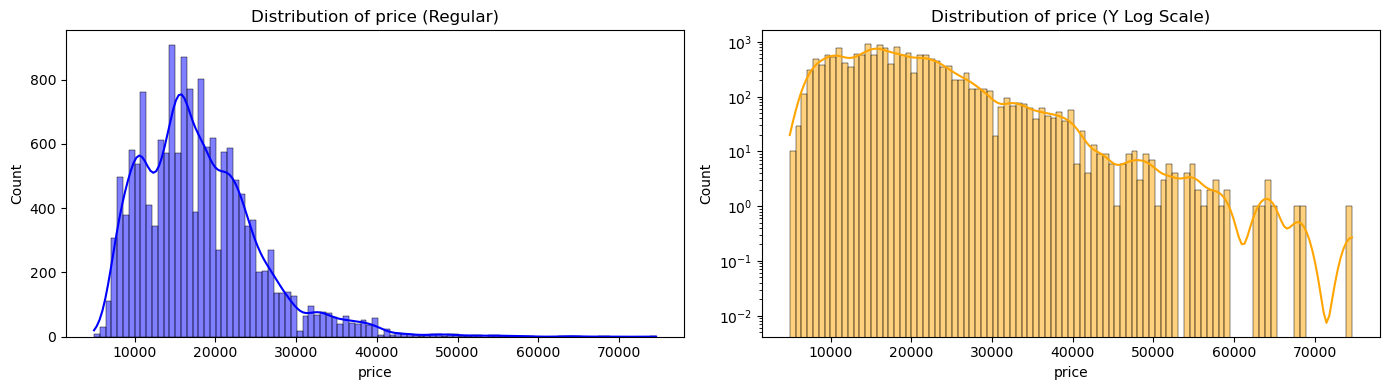

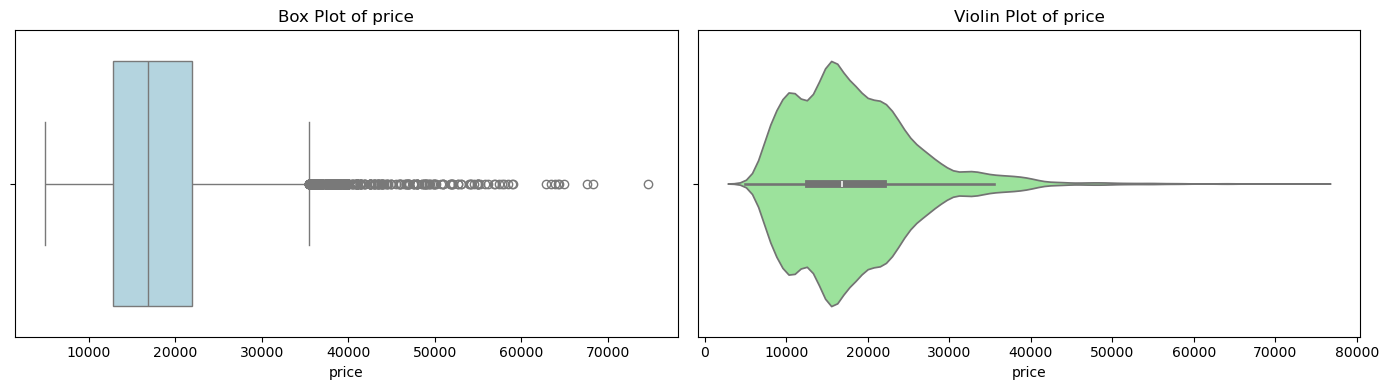

In [476]:
# Plot histograms for target feature
print(f"\nPre Outlier Treatment on {target_column}:")
plot_numerical_histograms(df_processed, target_column)
plot_numerical_boxplots_and_violins(df_processed, target_column)

**The target variable seems to be skewed. Perform suitable transformation on the target.**

In [477]:
# Transform the target feature

def outlier_treatment_z_score(df, col, threshold=3):
    df_copy = df.copy()

    # Calculate Z-scores
    df_copy['z_score'] = (df_copy[col] - df_copy[col].mean()) / df_copy[col].std()
    outliers = df_copy[df_copy['z_score'].abs() > threshold]
    print("-" * 75)
    print(f"Original record count: {df.shape[0]}")
    print(f"Number of outliers in '{col}' using Z-score method with threshold {threshold}: {outliers.shape[0]} ({(outliers.shape[0]/df.shape[0])*100:.2f}%)")

    # Optionally, remove outliers
    #display(df_copy[df_copy['z_score'].abs() > threshold])
    df_cleaned = df_copy[df_copy['z_score'].abs() <= threshold]
    print(f"Data shape after removing outliers: {df_cleaned.shape}")
    df_cleaned.drop(columns=['z_score'], inplace=True)
    print(f"Records removed: {df.shape[0] - df_cleaned.shape[0]}")
    return df_cleaned

df_processed = outlier_treatment_z_score(df_processed, 'price', threshold=3)

---------------------------------------------------------------------------
Original record count: 15915
Number of outliers in 'price' using Z-score method with threshold 3: 160 (1.01%)
Data shape after removing outliers: (15755, 24)
Records removed: 160


In [478]:
# Check for valid outliers for Audi AX and Renault Espace
print(f"Mean price for Audi A3: {df_processed[(df_processed['make_model'] == 'Audi A3')]['price'].mean()}")
print(f"Mean price for Renault Espace: {df_processed[df_processed['make_model'] == 'Renault Espace']['price'].mean()}")

Mean price for Audi A3: 20742.805790500977
Mean price for Renault Espace: 27865.379545454547



Post Outlier Treatment on ['price']:


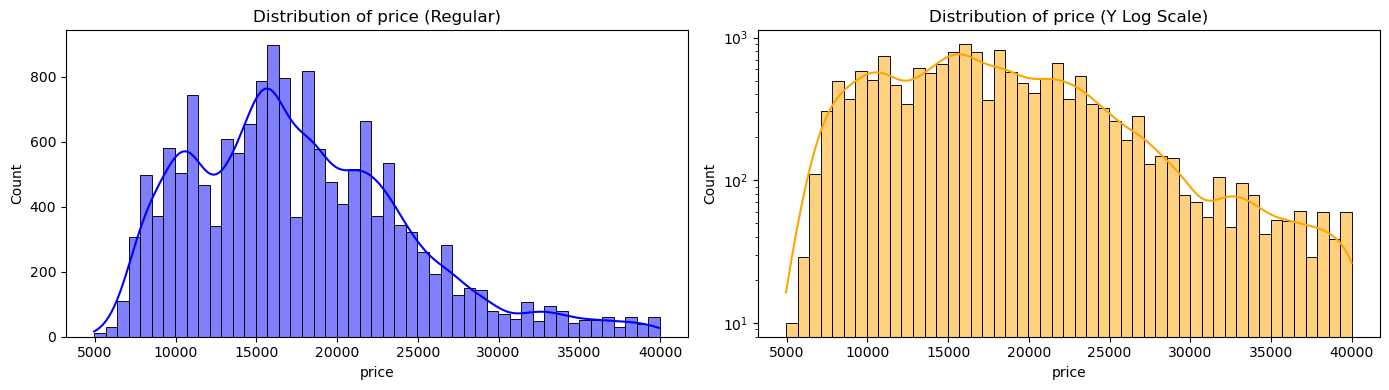

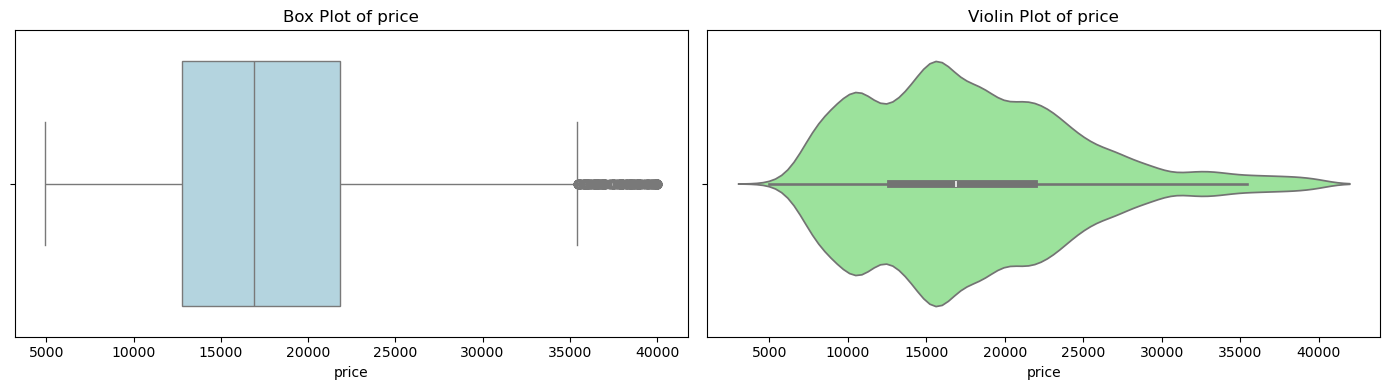

In [479]:
# Plot histograms for target feature
print(f"\nPost Outlier Treatment on {target_column}:")
plot_numerical_histograms(df_processed, target_column)
plot_numerical_boxplots_and_violins(df_processed, target_column)

### **2.2 Correlation analysis** <font color = red> [6 marks] </font>

#### **2.2.1** <font color =red> [3 marks] </font>
Plot the correlation map between features and target variable.

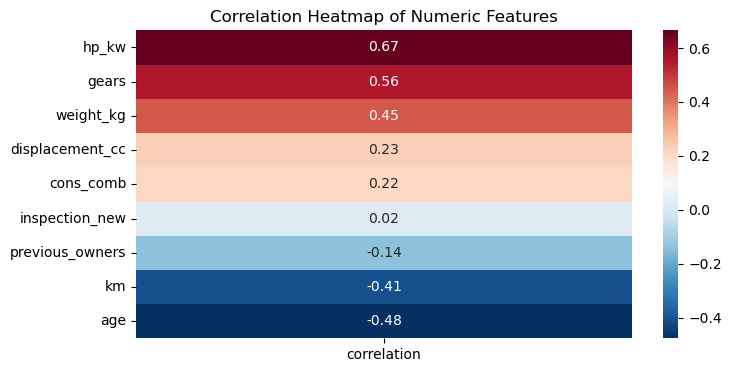

feature     type     score sign
0            hp_kw  numeric  0.665791    +
1            gears  numeric  0.555941    +
2              age  numeric  0.476724    -
3        weight_kg  numeric  0.448879    +
4               km  numeric  0.407932    -
5  displacement_cc  numeric  0.231158    +
6        cons_comb  numeric  0.217488    +
7  previous_owners  numeric  0.139923    -
8   inspection_new  numeric  0.018830    +

In [480]:
# Visualise correlation
# Numerical features correlation
def analyze_correlation(df, target_col, top_k=10):
    """
    Finds correlation/association between features and target.
    - Numeric features -> Pearson correlation

    Args:
        df (pd.DataFrame): Input dataframe
        target_col (str): Name of target column
        top_k (int): Number of top features to display

    Returns:
        pd.DataFrame: Combined feature importance ranking
    """
    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    results = []

    # Numeric features correlation  
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if numeric_features:
        corr = X[numeric_features].corrwith(y).sort_values(ascending=False)
        for col, score in corr.items():
            results.append({
                "feature": col,
                "type": "numeric",
                "score": abs(score),
                "sign": "+" if score >= 0 else "-"
            })

    # Plot a heatmap for numeric features correlation
    if numeric_features:
        plt.figure(figsize=(8, 4))
        sns.heatmap(corr.to_frame(name='correlation'), annot=True, fmt=".2f", cmap='RdBu_r', cbar=True)
        plt.title("Correlation Heatmap of Numeric Features")
        plt.show()

    # Convert results to DataFrame
    combined = pd.DataFrame(results)
    combined = combined.sort_values(by="score", ascending=False).reset_index(drop=True)

    # Display top K features
    display(combined.head(top_k))
    return combined.head(top_k) 

# Example run
num_feature_importance = analyze_correlation(df_processed, target_column[0], top_k=20)

#### **2.2.2** <font color =red> [3 marks] </font>
Analyse correlation between categorical features and target variable.

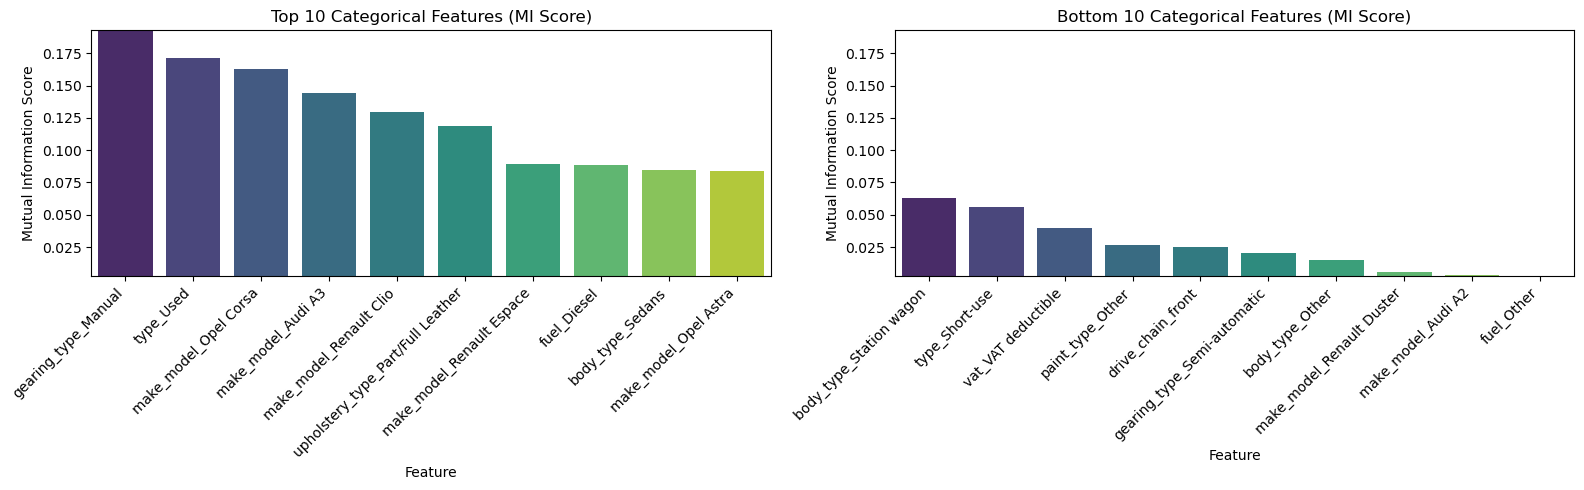

MI Score Ranking of Top 10 Categorical Features:


feature         type     score  sign
0                gearing_type_Manual  categorical  0.192905  None
1                          type_Used  categorical  0.171223  None
2              make_model_Opel Corsa  categorical  0.163222  None
3                 make_model_Audi A3  categorical  0.144701  None
4            make_model_Renault Clio  categorical  0.129497  None
5  upholstery_type_Part/Full Leather  categorical  0.118510  None
6          make_model_Renault Espace  categorical  0.089365  None
7                        fuel_Diesel  categorical  0.088448  None
8                   body_type_Sedans  categorical  0.084705  None
9              make_model_Opel Astra  categorical  0.084110  None

MI Score Ranking of Bottom 10 Categorical Features:


feature         type     score  sign
12      body_type_Station wagon  categorical  0.062802  None
13               type_Short-use  categorical  0.055795  None
14           vat_VAT deductible  categorical  0.039553  None
15             paint_type_Other  categorical  0.026313  None
16            drive_chain_front  categorical  0.025086  None
17  gearing_type_Semi-automatic  categorical  0.020173  None
18              body_type_Other  categorical  0.014975  None
19    make_model_Renault Duster  categorical  0.005422  None
20           make_model_Audi A2  categorical  0.002962  None
21                   fuel_Other  categorical  0.002349  None

In [484]:
# Visualise correlation
#from sklearn.feature_selection import mutual_info_regression

def analyze_correlation(df, target_col, top_k=10):
    """
    Finds correlation/association between features and target.
    - Numeric features -> Pearson correlation
    - Categorical features -> Mutual Information (MI)

    Args:
        df (pd.DataFrame): Input dataframe
        target_col (str): Name of target column
        top_k (int): Number of top features to display

    Returns:
        pd.DataFrame: Combined feature importance ranking
    """
    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    results = []

    #categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
    # Select Categorical features except the ones which have comma-separated multiple values 
    categorical_features = ['make_model', 'body_type', 'vat', 'type', 'fuel','paint_type', 'upholstery_type','gearing_type', 'drive_chain']
    if categorical_features:
        X_cat = pd.get_dummies(X[categorical_features], drop_first=True)
        mi_scores = mutual_info_regression(X_cat, y, random_state=42)
        for col, score in zip(X_cat.columns, mi_scores):
            results.append({
                "feature": col,
                "type": "categorical",
                "score": score,
                "sign": None  # MI has no sign
            })

    # Convert results to DataFrame
    combined = pd.DataFrame(results)
    combined = combined.sort_values(by="score", ascending=False).reset_index(drop=True)

    # Plot a bar plot for categorical features MI scores
    if categorical_features:
        fig, axes = plt.subplots(1, 2, figsize=(max(16, top_k), 5))
        sns.barplot(x='feature', y='score', data=combined.head(top_k), palette='viridis', ax=axes[0])
        axes[0].set_title(f"Top {top_k} Categorical Features (MI Score)")
        axes[0].set_xlabel("Feature")
        axes[0].set_ylabel("Mutual Information Score")
        plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')

        sns.barplot(x='feature', y='score', data=combined.tail(top_k), palette='viridis', ax=axes[1])
        axes[1].set_title(f"Bottom {top_k} Categorical Features (MI Score)")
        axes[1].set_xlabel("Feature")
        axes[1].set_ylabel("Mutual Information Score")
        plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')

        min_score = combined['score'].min()
        max_score = combined['score'].max()
        axes[0].set_ylim(min_score, max_score)
        axes[1].set_ylim(min_score, max_score)

        plt.tight_layout()
        plt.show()

    # Display top K features
    print (f"MI Score Ranking of Top {top_k} Categorical Features:")
    display(combined.head(top_k))

    # Display bottom K features
    print (f"MI Score Ranking of Bottom {top_k} Categorical Features:")
    display(combined.tail(top_k))
    return combined.head(top_k)

# Example run
feature_importance = analyze_correlation(df_processed, target_column[0], top_k=10)


In [485]:
# Assume num_feature_importance and cat_feature_importance are DataFrames from your previous analysis
# Both should have columns: 'feature', 'type', 'score', (and optionally 'sign')

# Concatenate the two DataFrames
combined_feature_importance = pd.concat([num_feature_importance, cat_feature_importance], ignore_index=True)

# Sort by absolute score (descending)
combined_feature_importance = combined_feature_importance.sort_values(by="score", ascending=False).reset_index(drop=True)

# Display the top features
display(combined_feature_importance.head(20))

feature         type     score  sign
0                               hp_kw      numeric  0.665791     +
1                               gears      numeric  0.555941     +
2                                 age      numeric  0.476724     -
3                           weight_kg      numeric  0.448879     +
4                                  km      numeric  0.407932     -
5                     displacement_cc      numeric  0.231158     +
6                           cons_comb      numeric  0.217488     +
7                 gearing_type_Manual  categorical  0.192905  None
8                           type_Used  categorical  0.171223  None
9               make_model_Opel Corsa  categorical  0.163222  None
10                 make_model_Audi A3  categorical  0.144701  None
11                    previous_owners      numeric  0.139923     -
12            make_model_Renault Clio  categorical  0.129497  None
13  upholstery_type_Part/Full Leather  categorical  0.118510  None
14          make_model_Renault Espace  categorical  0.089365  None
15                        fuel_Diesel  categorical  0.088448  None
16                   body_type_Sedans  categorical  0.084705  None
17              make_model_Opel Astra  categorical  0.084110  None
18           make_model_Opel Insignia  categorical  0.078558  None
19                      body_type_Van  categorical  0.065316  None

### Feature Importance Summary

- The table below combines the top numerical and categorical features most strongly associated with the target variable.
- **Numerical features** are ranked by absolute Pearson correlation with the target.
- **Categorical features** are ranked by mutual information (MI) with the target.
- This combined ranking helps prioritize which features to focus on for modeling and interpretation.

**Inferences:**

| Rank | Feature                                 | Type        | Score | Sign   | Inference                                                            |
| ---- | --------------------------------------- | ----------- | ----- | ------ | -------------------------------------------------------------------- |
| 1    | **hp\_kw**                              | Numeric     | 0.666 | +      | Strongest driver of price. More engine power → higher price.         |
| 2    | **gears**                               | Numeric     | 0.556 | +      | More gears (modern transmissions) → generally higher prices.         |
| 3    | **age**                                 | Numeric     | 0.477 | –      | Older cars lose value. Strong negative effect.                       |
| 4    | **weight\_kg**                          | Numeric     | 0.449 | +      | Heavier cars (luxury/SUVs) are costlier.                             |
| 5    | **km**                                  | Numeric     | 0.408 | –      | Higher mileage reduces price, though less than age.                  |
| 6    | **displacement\_cc**                    | Numeric     | 0.231 | +      | Bigger engines → higher prices, though weaker than horsepower.       |
| 7    | **cons\_comb**                          | Numeric     | 0.217 | +      | Higher consumption → often premium/performance cars.                 |
| 8    | **gearing\_type\_Manual**               | Categorical | 0.193 | –/None | Manual cars usually cheaper than automatics (signal of lower price). |
| 9    | **type\_Used**                          | Categorical | 0.171 | –/None | Used cars priced lower than new ones.                                |
| 10   | **make\_model\_Opel Corsa**             | Categorical | 0.163 | –/None | Budget model → pulls price down.                                     |
| 11   | **make\_model\_Audi A3**                | Categorical | 0.145 | +      | Premium model → lifts price.                                         |
| 12   | **previous\_owners**                    | Numeric     | 0.140 | –      | More owners reduce resale value.                                     |
| 13   | **make\_model\_Renault Clio**           | Categorical | 0.129 | –/None | Mass-market model, generally lower priced.                           |
| 14   | **upholstery\_type\_Part/Full Leather** | Categorical | 0.119 | +      | Premium interiors increase price.                                    |
| 15   | **make\_model\_Renault Espace**         | Categorical | 0.089 | –/None | Family van, not premium → lower prices.                              |
| 16   | **fuel\_Diesel**                        | Categorical | 0.088 | ±      | Diesel cars affect price; historically valuable in EU, now mixed.    |
| 17   | **body\_type\_Sedans**                  | Categorical | 0.085 | ±      | Sedans have moderate premium depending on market.                    |
| 18   | **make\_model\_Opel Astra**             | Categorical | 0.084 | –/None | Mid-segment Opel → relatively lower priced.                          |
| 19   | **make\_model\_Opel Insignia**          | Categorical | 0.079 | –/None | Slightly higher than Astra but still budget vs luxury brands.        |
| 20   | **body\_type\_Van**                     | Categorical | 0.065 | –      | Vans typically lower resale vs SUVs/sedans.                          |


<Figure size 1600x1600 with 0 Axes>

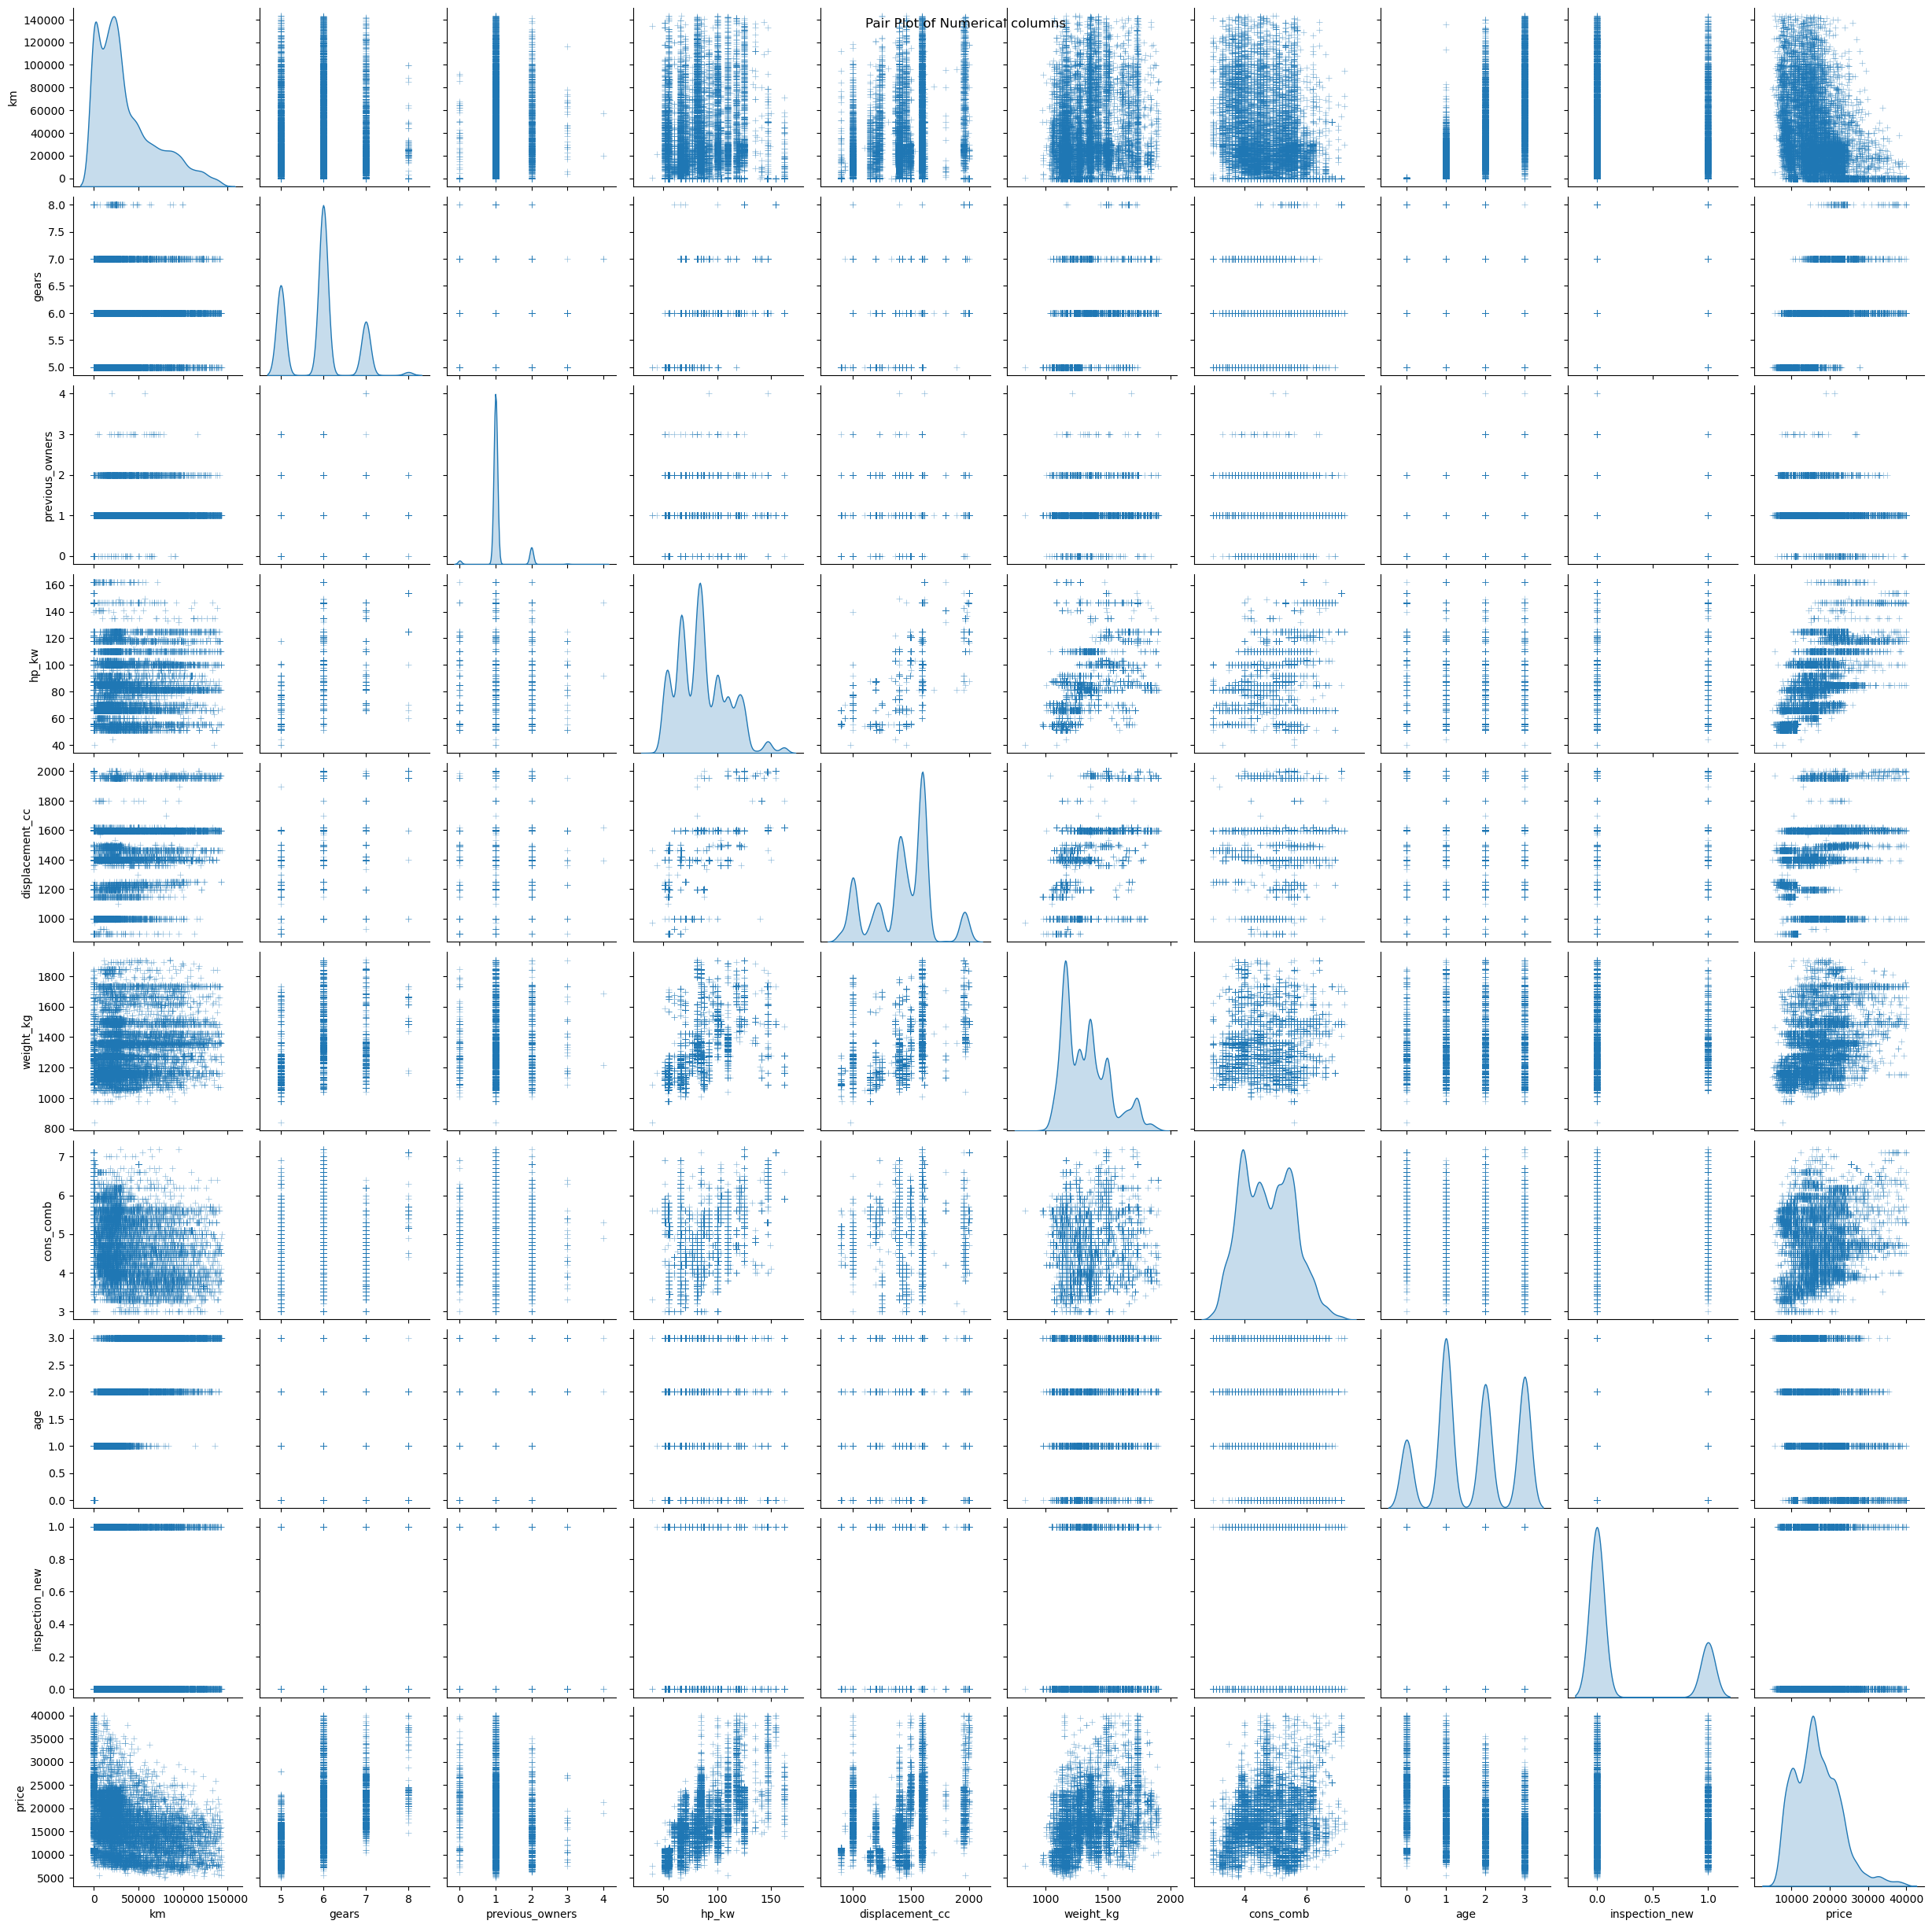

In [493]:
# Pair plot of all variables
plt.figure(figsize=(16, 16))
sns.pairplot(df_out[num_columns + target_column], diag_kind='kde', markers='+', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Numerical columns")
plt.show()

### **2.3 Outlier analysis** <font color = red> [5 marks] </font>

#### **2.3.1** <font color =red> [2 marks] </font>
Identify potential outliers in the data.


Pre Outlier Treatment on ['km', 'hp_kw', 'displacement_cc', 'weight_kg', 'cons_comb']:


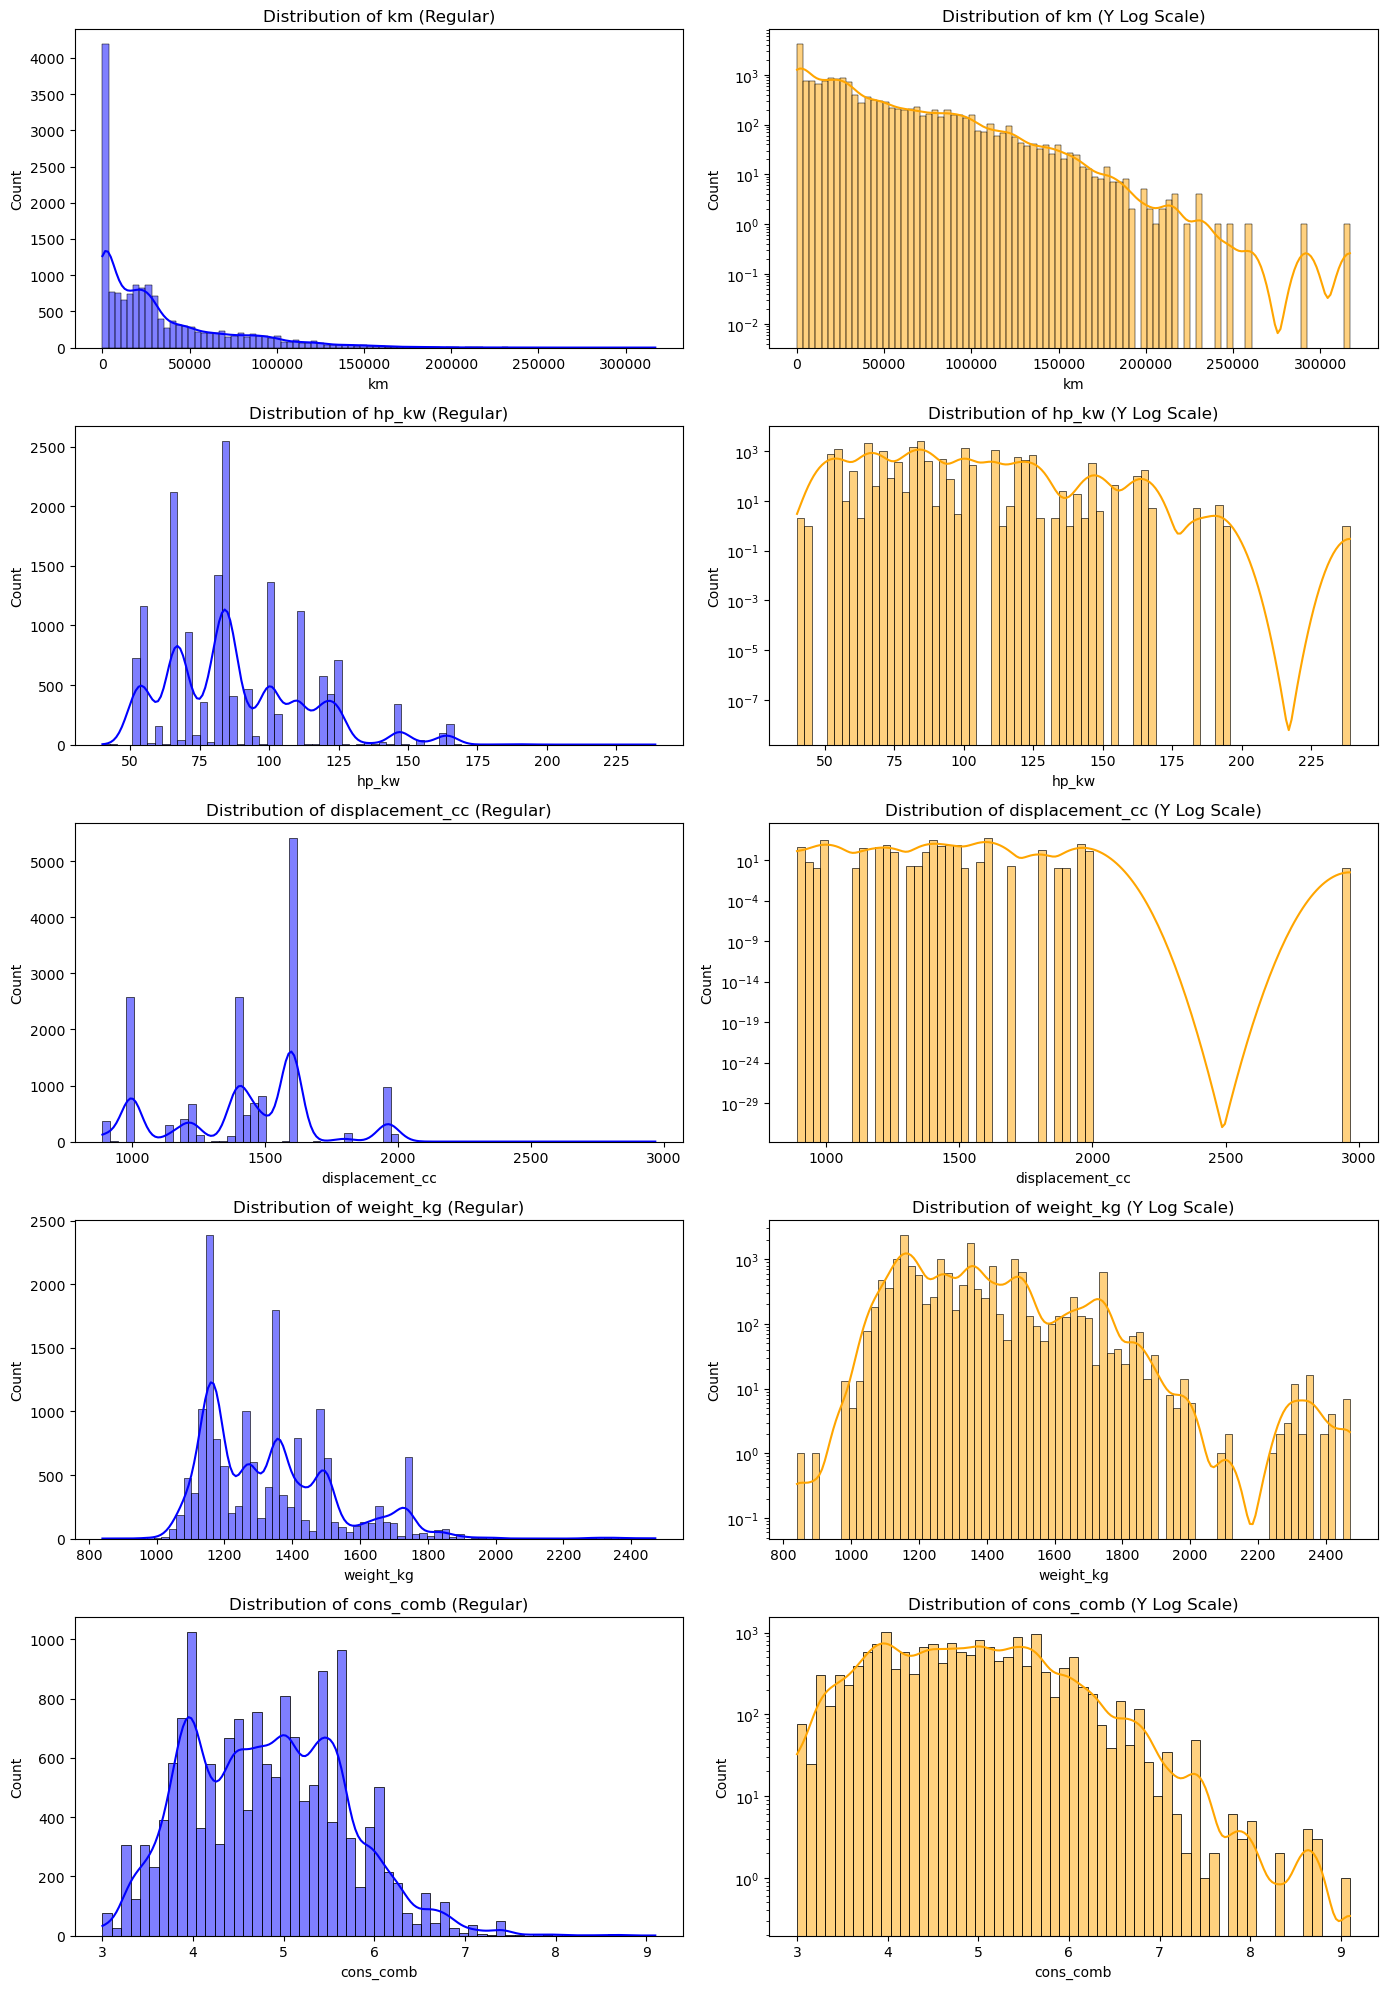

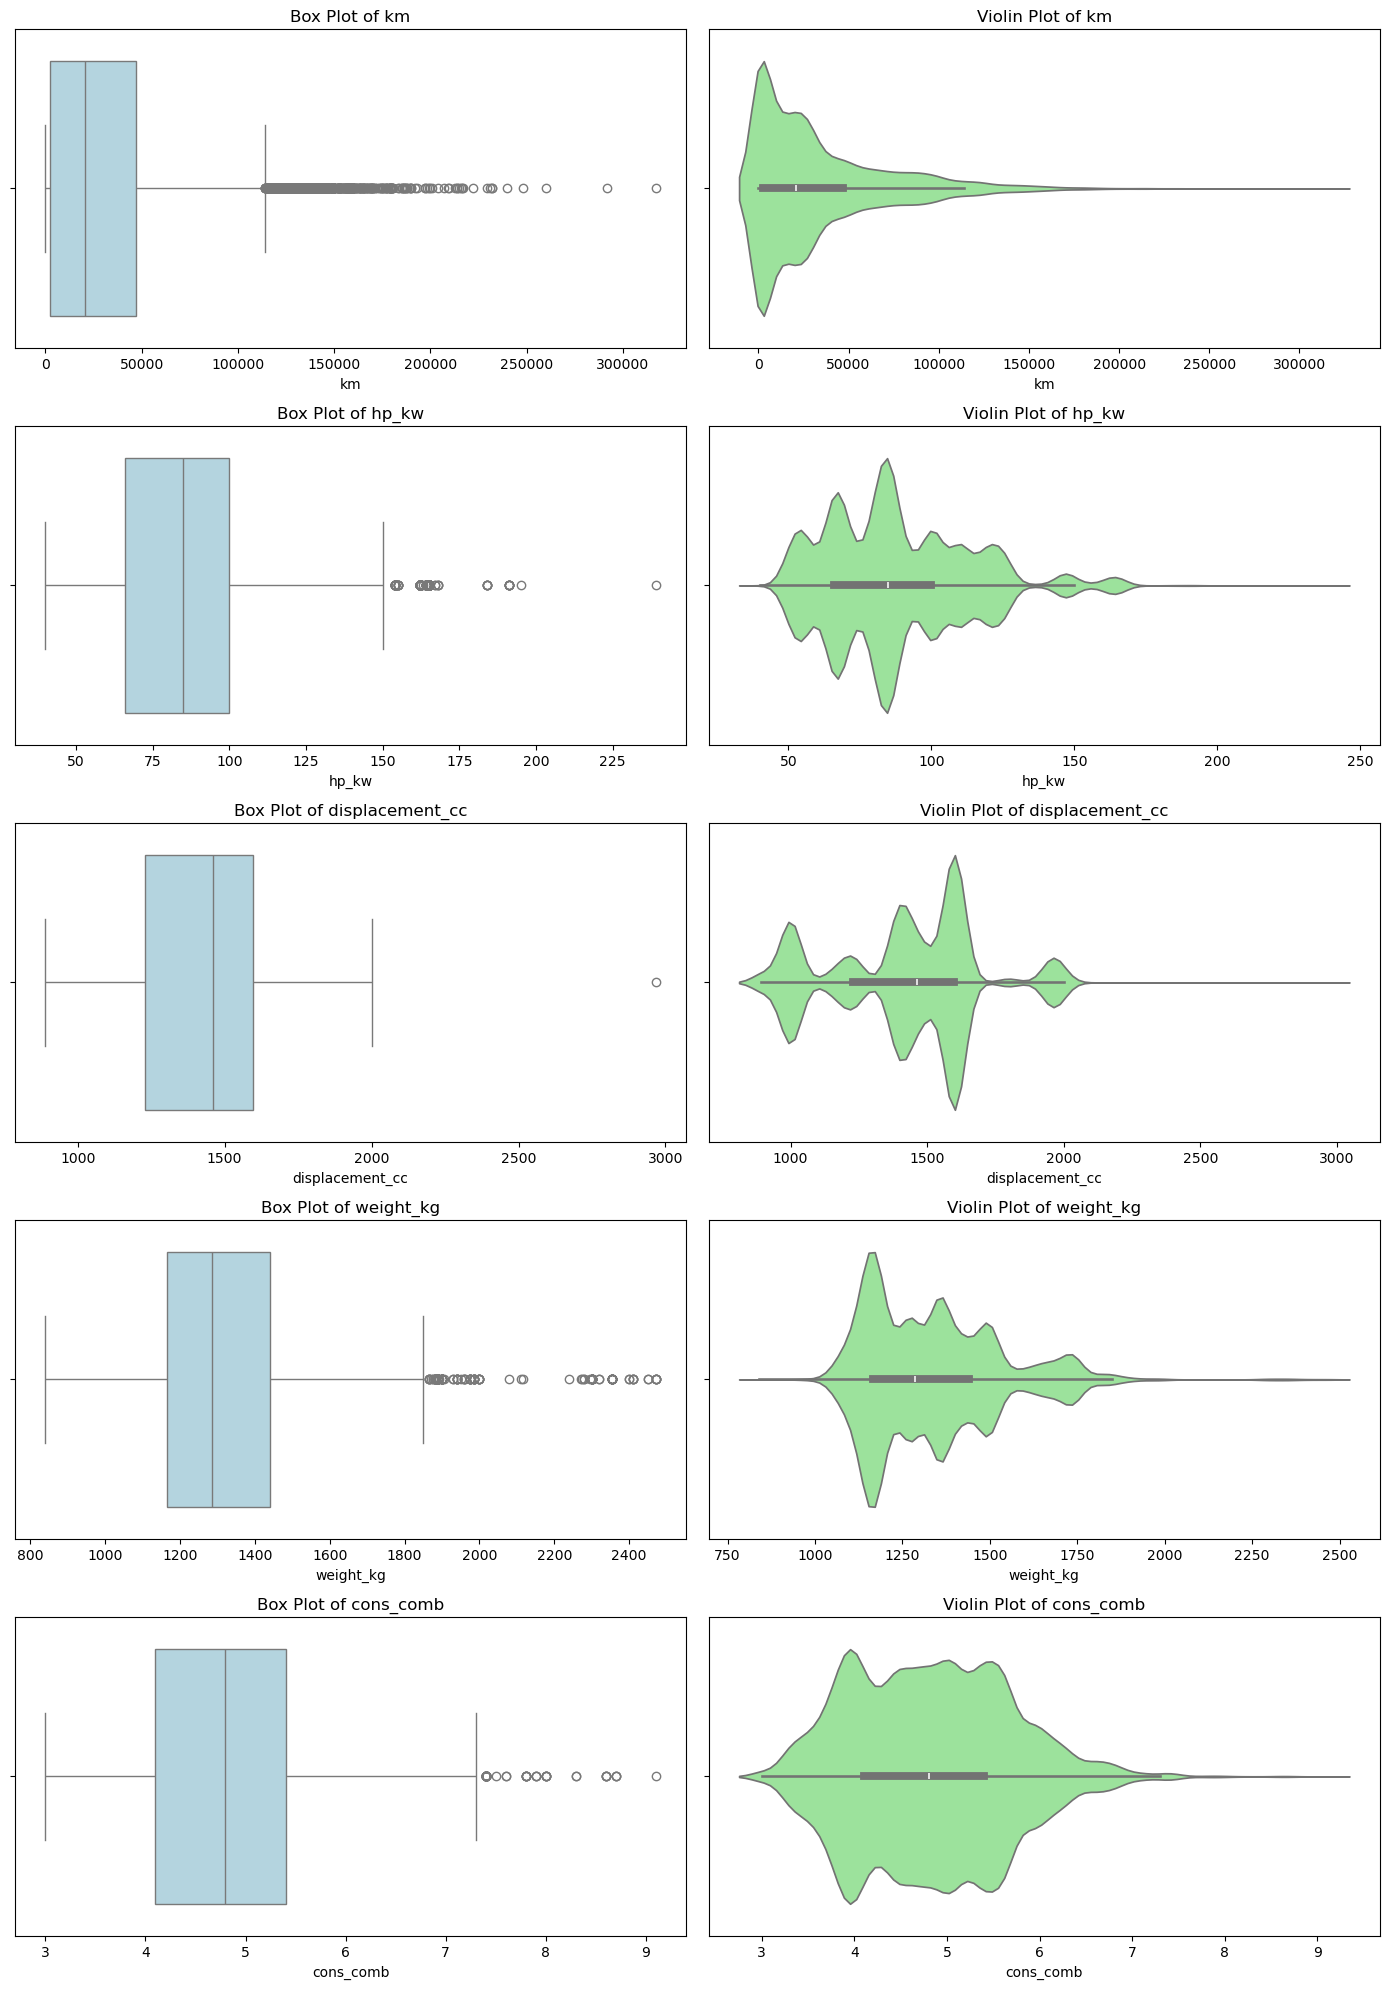

In [171]:
# Outliers present in each column

print(f"\nPre Outlier Treatment on {short_num_cols}:")
short_num_cols = ['km','hp_kw','displacement_cc','weight_kg','cons_comb']
plot_numerical_histograms(df_processed, short_num_cols)
plot_numerical_boxplots_and_violins(df_processed, short_num_cols)


#### **2.3.2** <font color =red> [3 marks] </font>
Handle the outliers suitably.

---------------------------------------------------------------------------
Original record count: 15755
Number of outliers in 'km' using Z-score method with threshold 3: 260 (1.65%)
Data shape after removing outliers: (15495, 24)
Records removed: 260
---------------------------------------------------------------------------
Original record count: 15495
Number of outliers in 'hp_kw' using Z-score method with threshold 3: 189 (1.22%)
Data shape after removing outliers: (15306, 24)
Records removed: 189
---------------------------------------------------------------------------
Original record count: 15306
Number of outliers in 'displacement_cc' using Z-score method with threshold 3: 0 (0.00%)
Data shape after removing outliers: (15306, 24)
Records removed: 0
---------------------------------------------------------------------------
Original record count: 15306
Number of outliers in 'weight_kg' using Z-score method with threshold 3: 83 (0.54%)
Data shape after removing outliers: (15223,

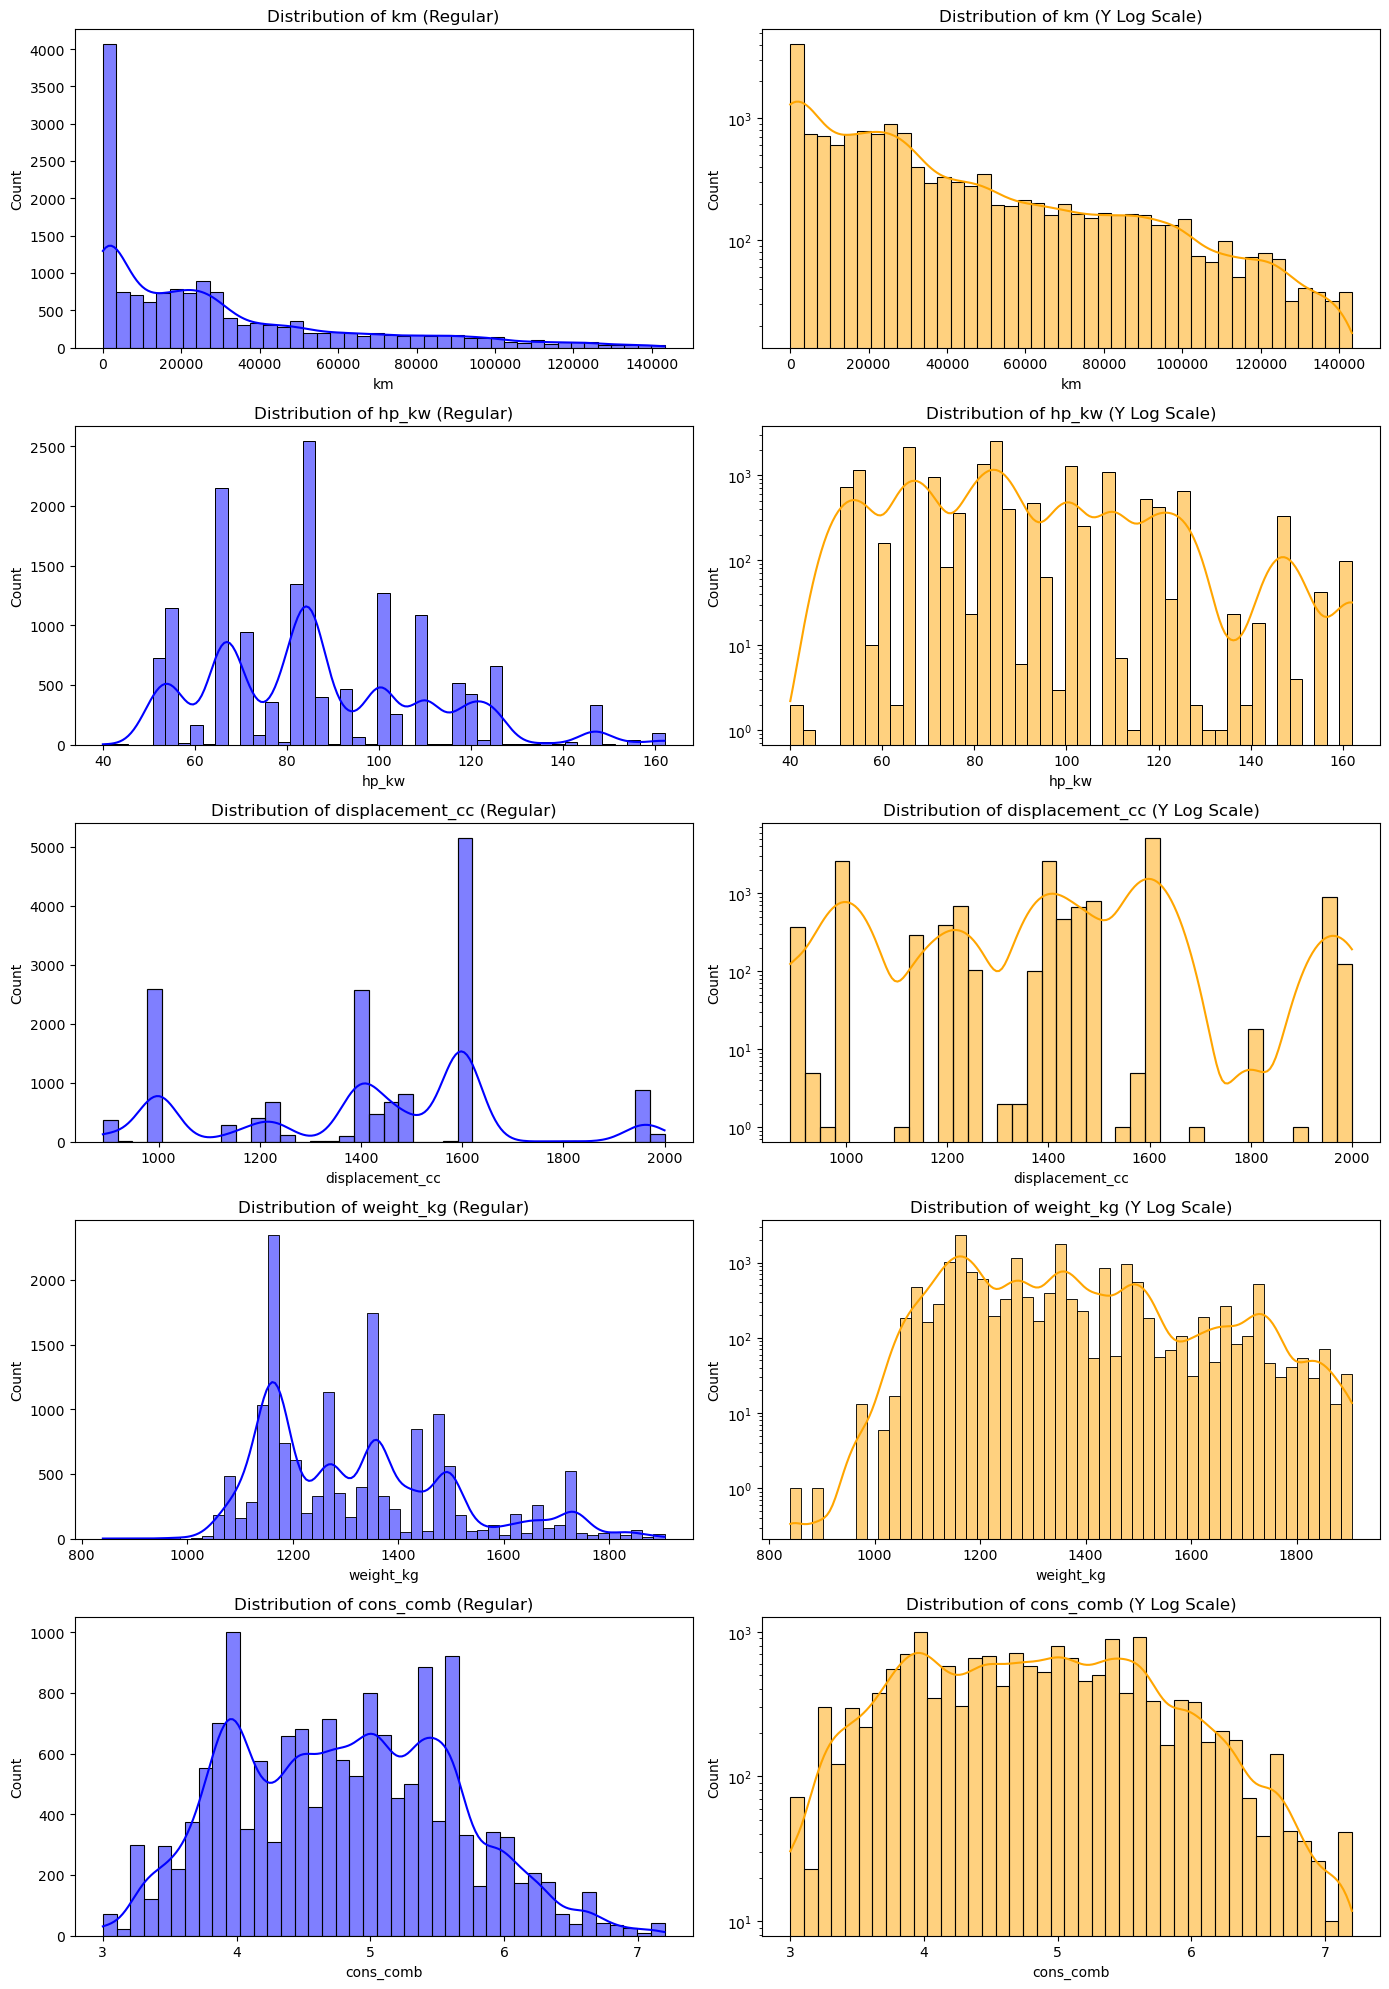

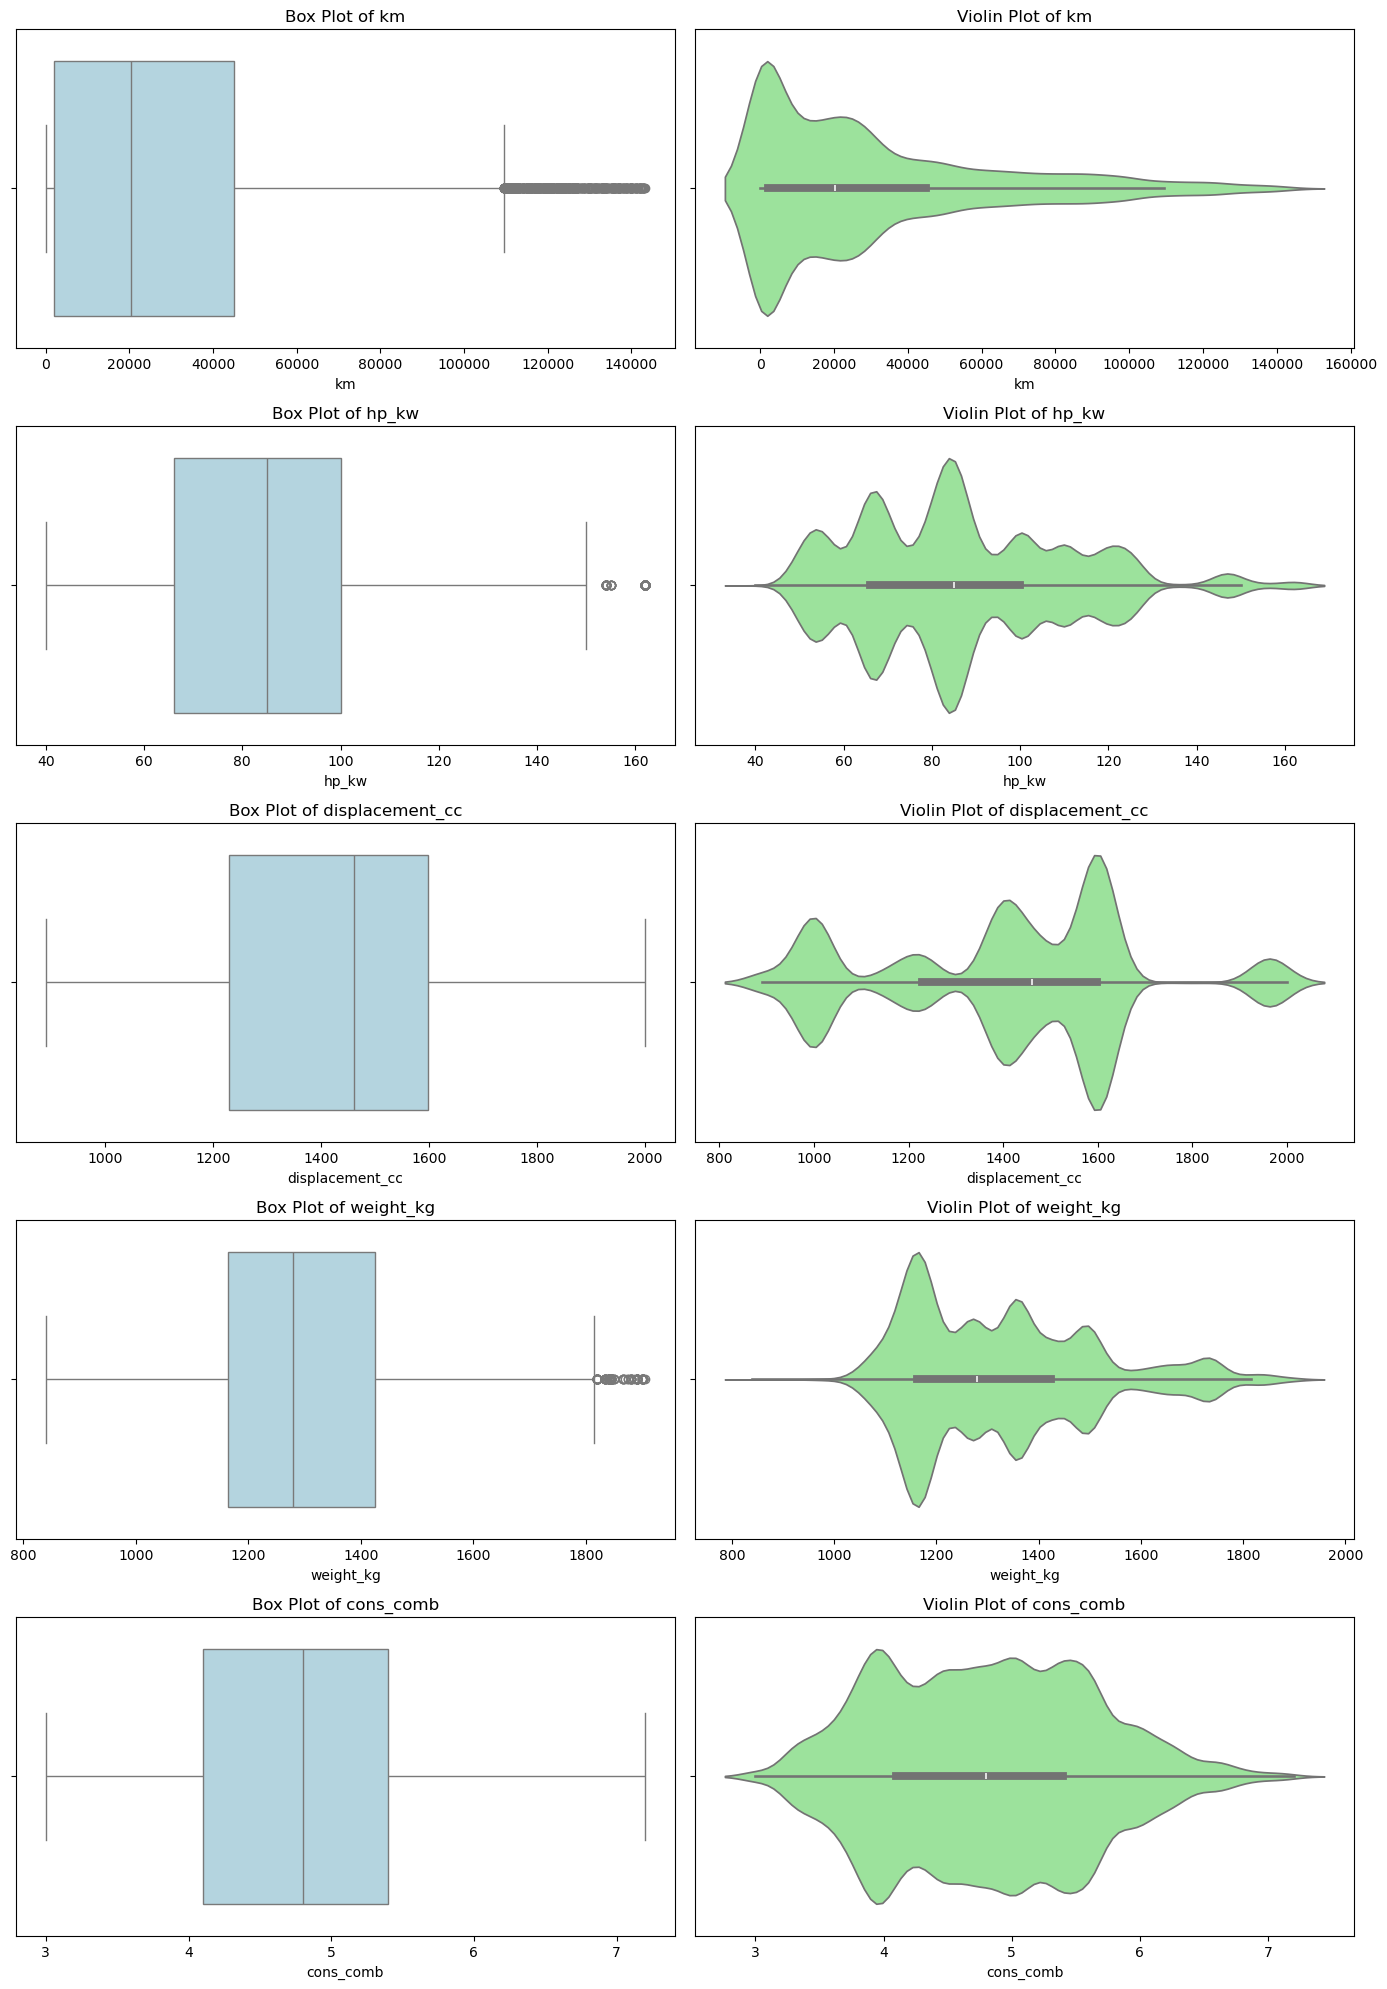

In [486]:
# Handle outliers
df_out = outlier_treatment_z_score(df_processed, 'km', threshold=3)
df_out = outlier_treatment_z_score(df_out, 'hp_kw', threshold=3)
df_out = outlier_treatment_z_score(df_out, 'displacement_cc', threshold=3)
df_out = outlier_treatment_z_score(df_out, 'weight_kg', threshold=3)
df_out = outlier_treatment_z_score(df_out, 'cons_comb', threshold=3)

plot_numerical_histograms(df_out, short_num_cols)
plot_numerical_boxplots_and_violins(df_out, short_num_cols)

In [488]:
def data_quality_checks(df):
    # print the records where age is zero
    print(f"-"*75)
    print(f"\nData Quality Checks Driven Cleanup - age")
    print(f"- There are {len(df[df['age'] == 0])} cars with zero age which is valid for new cars.")
    print(f"- There are {len(df[(df['age'] == 0) & (df['km'] > 1000)])} cars with zero age and high km.")
    print(f"- There are {len(df[(df['age'] == 0) & (df['type'].str.lower() != 'new')])} cars with zero age and type <> new.")
    print(f"- There are {len(df[(df['age'] == 0) & (df['km'] > 1000) & (df['type'].str.lower() != 'new')])} cars with zero age, high km and type <> new.")
    print(f"- These records are likely data quality issues and will be removed.")
    df = df[~((df['age'] == 0) & (df['type'].str.lower() != 'new'))]
    df = df[~((df['age'] == 0) & (df['km'] > 1000))]

    print(f"\nData Quality Counts Post Cleanup - age")
    print(f"- There are {len(df[df['age'] == 0])} cars with zero age which is valid for new cars.")
    print(f"- There are {len(df[(df['age'] == 0) & (df['km'] > 1000)])} cars with zero age and high km.")
    print(f"- There are {len(df[(df['age'] == 0) & (df['type'].str.lower() != 'new')])} cars with zero age and type <> new.")
    print(f"- There are {len(df[(df['age'] == 0) & (df['km'] > 1000) & (df['type'].str.lower() != 'new')])} cars with zero age, high km and type <> new.")
    print(f"- These records are likely data quality issues and will be removed.")

    # print the records where age is zero
    print(f"-"*75)
    print(f"\nData Quality Checks Driven Cleanup - km")
    print(f"- There are {len(df[df['km'] == 0])} cars with zero km which is valid for new cars.")
    print(f"- There are {len(df[(df['km'] == 0) & (df['type'].str.lower() != 'new')])} cars with zero km and type <> new.")
    print(f"- There are {len(df[(df['km'] == 0) & (df['age'] != 0)])} cars with zero km, age <> 0.")
    print(f"- These look like brand new cars, example the ones in showroom without usage, hence will be retained.")

    return df

df_out = data_quality_checks(df=df_out)


---------------------------------------------------------------------------

Data Quality Checks Driven Cleanup - age
- There are 1774 cars with zero age which is valid for new cars.
- There are 0 cars with zero age and high km.
- There are 0 cars with zero age and type <> new.
- There are 0 cars with zero age, high km and type <> new.
- These records are likely data quality issues and will be removed.

Data Quality Counts Post Cleanup - age
- There are 1774 cars with zero age which is valid for new cars.
- There are 0 cars with zero age and high km.
- There are 0 cars with zero age and type <> new.
- There are 0 cars with zero age, high km and type <> new.
- These records are likely data quality issues and will be removed.
---------------------------------------------------------------------------

Data Quality Checks Driven Cleanup - km
- There are 19 cars with zero km which is valid for new cars.
- There are 0 cars with zero km and type <> new.
- There are 0 cars with zero km, age <

In [217]:
df_out['make_model'].unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Espace'], dtype=object)

In [490]:
# Check for realistic value ranges for desired models
def data_outlier_checks(df):
    print (f"Checking for realistic value ranges for ['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa','Opel Insignia', 'Renault Clio', 'Renault Espace']")
    print(f"- Car weight should be positive")
    print(f"- Engine displacement should be positive")
    print(f"- Car weight should be between 600 and 3500 kg")
    print(f"- Displacement should be between 890 and 3000 cc")
    print(f"- Engine power (hp_kw) should be between 40 and 300 kW")
    print(f"- Combined fuel consumption (cons_comb) should be between 3 and 15 L/100km")
    print(f"- Car age should be between 0 and 30 years")
    print(f"- Car mileage (km) should be between 0 and 400,000 km")

    # Check for negative or zero values
    assert (df['weight_kg'] > 0).all(), "Car weight should be positive"
    assert (df['displacement_cc'] > 0).all(), "Engine displacement should be positive"

    # Check for realistic value ranges
    assert df['weight_kg'].between(800, 2200).all(), "Car weight out of realistic range (800-2200 kg)"
    assert df['displacement_cc'].between(890, 3000).all(), "Displacement out of realistic range (890-3000 cc)"
    assert df['hp_kw'].between(40, 300).all(), "Engine power (hp_kw) out of realistic range (40-300 kW)"
    assert df['cons_comb'].between(3, 15).all(), "Combined fuel consumption out of realistic range (3-15 L/100km)"
    assert df['age'].between(0, 30).all(), "Car age out of realistic range (0-30 years)"
    assert df['km'].between(0, 400000).all(), "Car mileage out of realistic range (0-400,000 km)"

    # Check for missing values
    assert not df[['weight_kg', 'displacement_cc', 'hp_kw', 'cons_comb', 'age', 'km']].isnull().any().any(), "Missing values found in key columns"

    # Print the summary statistics after outlier treatment
    print("-"*75)
    print("\nPost Outlier Treatment Summary Statistics (Min, Max, Missing, Negative, Zero counts):")
    for col in ['weight_kg', 'displacement_cc', 'hp_kw', 'cons_comb', 'age', 'km']:
        print(f"- {col}: min={df[col].min()}, max={df[col].max()}, missing={df[col].isnull().sum()}, negative={(df[col] < 0).sum()}, zero={(df[col] == 0).sum()}")

    # Check for outliers using quantiles
    print("-"*75)
    print("\nPost Z-score Outlier Treatment - Records above 99th percentile:")
    print("- Weight (kg) above 99th percentile:", len(df[df['weight_kg'] > df['weight_kg'].quantile(0.99)]))
    print("- Displacement (cc) above 99th percentile:", len(df[df['displacement_cc'] > df['displacement_cc'].quantile(0.99)]))
    print("- HP (kW) above 99th percentile:", len(df[df['hp_kw'] > df['hp_kw'].quantile(0.99)]))
    print("- Fuel consumption (cons_comb) above 99th percentile:", len(df[df['cons_comb'] > df['cons_comb'].quantile(0.99)]))

    print("-"*75)
    print(f"Post Outlier Treatment and Data Validation:")
    print(f"- All values of weight_kg, displacement_cc, hp_kw, cons_comb, age, km are within realistic ranges")
    print(f"- No missing or negative values in key columns weight_kg, displacement_cc, hp_kw, cons_comb, age, km")
    print(f"- There are few records above 99th percentile in Weight, Displacement, HP, fuel consumption which are valid high-end cars")

data_outlier_checks(df=df_out)


Checking for realistic value ranges for ['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa','Opel Insignia', 'Renault Clio', 'Renault Espace']
- Car weight should be positive
- Engine displacement should be positive
- Car weight should be between 600 and 3500 kg
- Displacement should be between 890 and 3000 cc
- Engine power (hp_kw) should be between 40 and 300 kW
- Combined fuel consumption (cons_comb) should be between 3 and 15 L/100km
- Car age should be between 0 and 30 years
- Car mileage (km) should be between 0 and 400,000 km
---------------------------------------------------------------------------

Post Outlier Treatment Summary Statistics (Min, Max, Missing, Negative, Zero counts):
- weight_kg: min=840.0, max=1905.0, missing=0, negative=0, zero=0
- displacement_cc: min=898.0, max=2000.0, missing=0, negative=0, zero=0
- hp_kw: min=40.0, max=162.0, missing=0, negative=0, zero=0
- cons_comb: min=3.0, max=7.2, missing=0, negative=0, zero=0
- age: min=0.0, max=3.0, missi

In [491]:
df_out.shape

(12777, 23)

<Figure size 1600x1600 with 0 Axes>

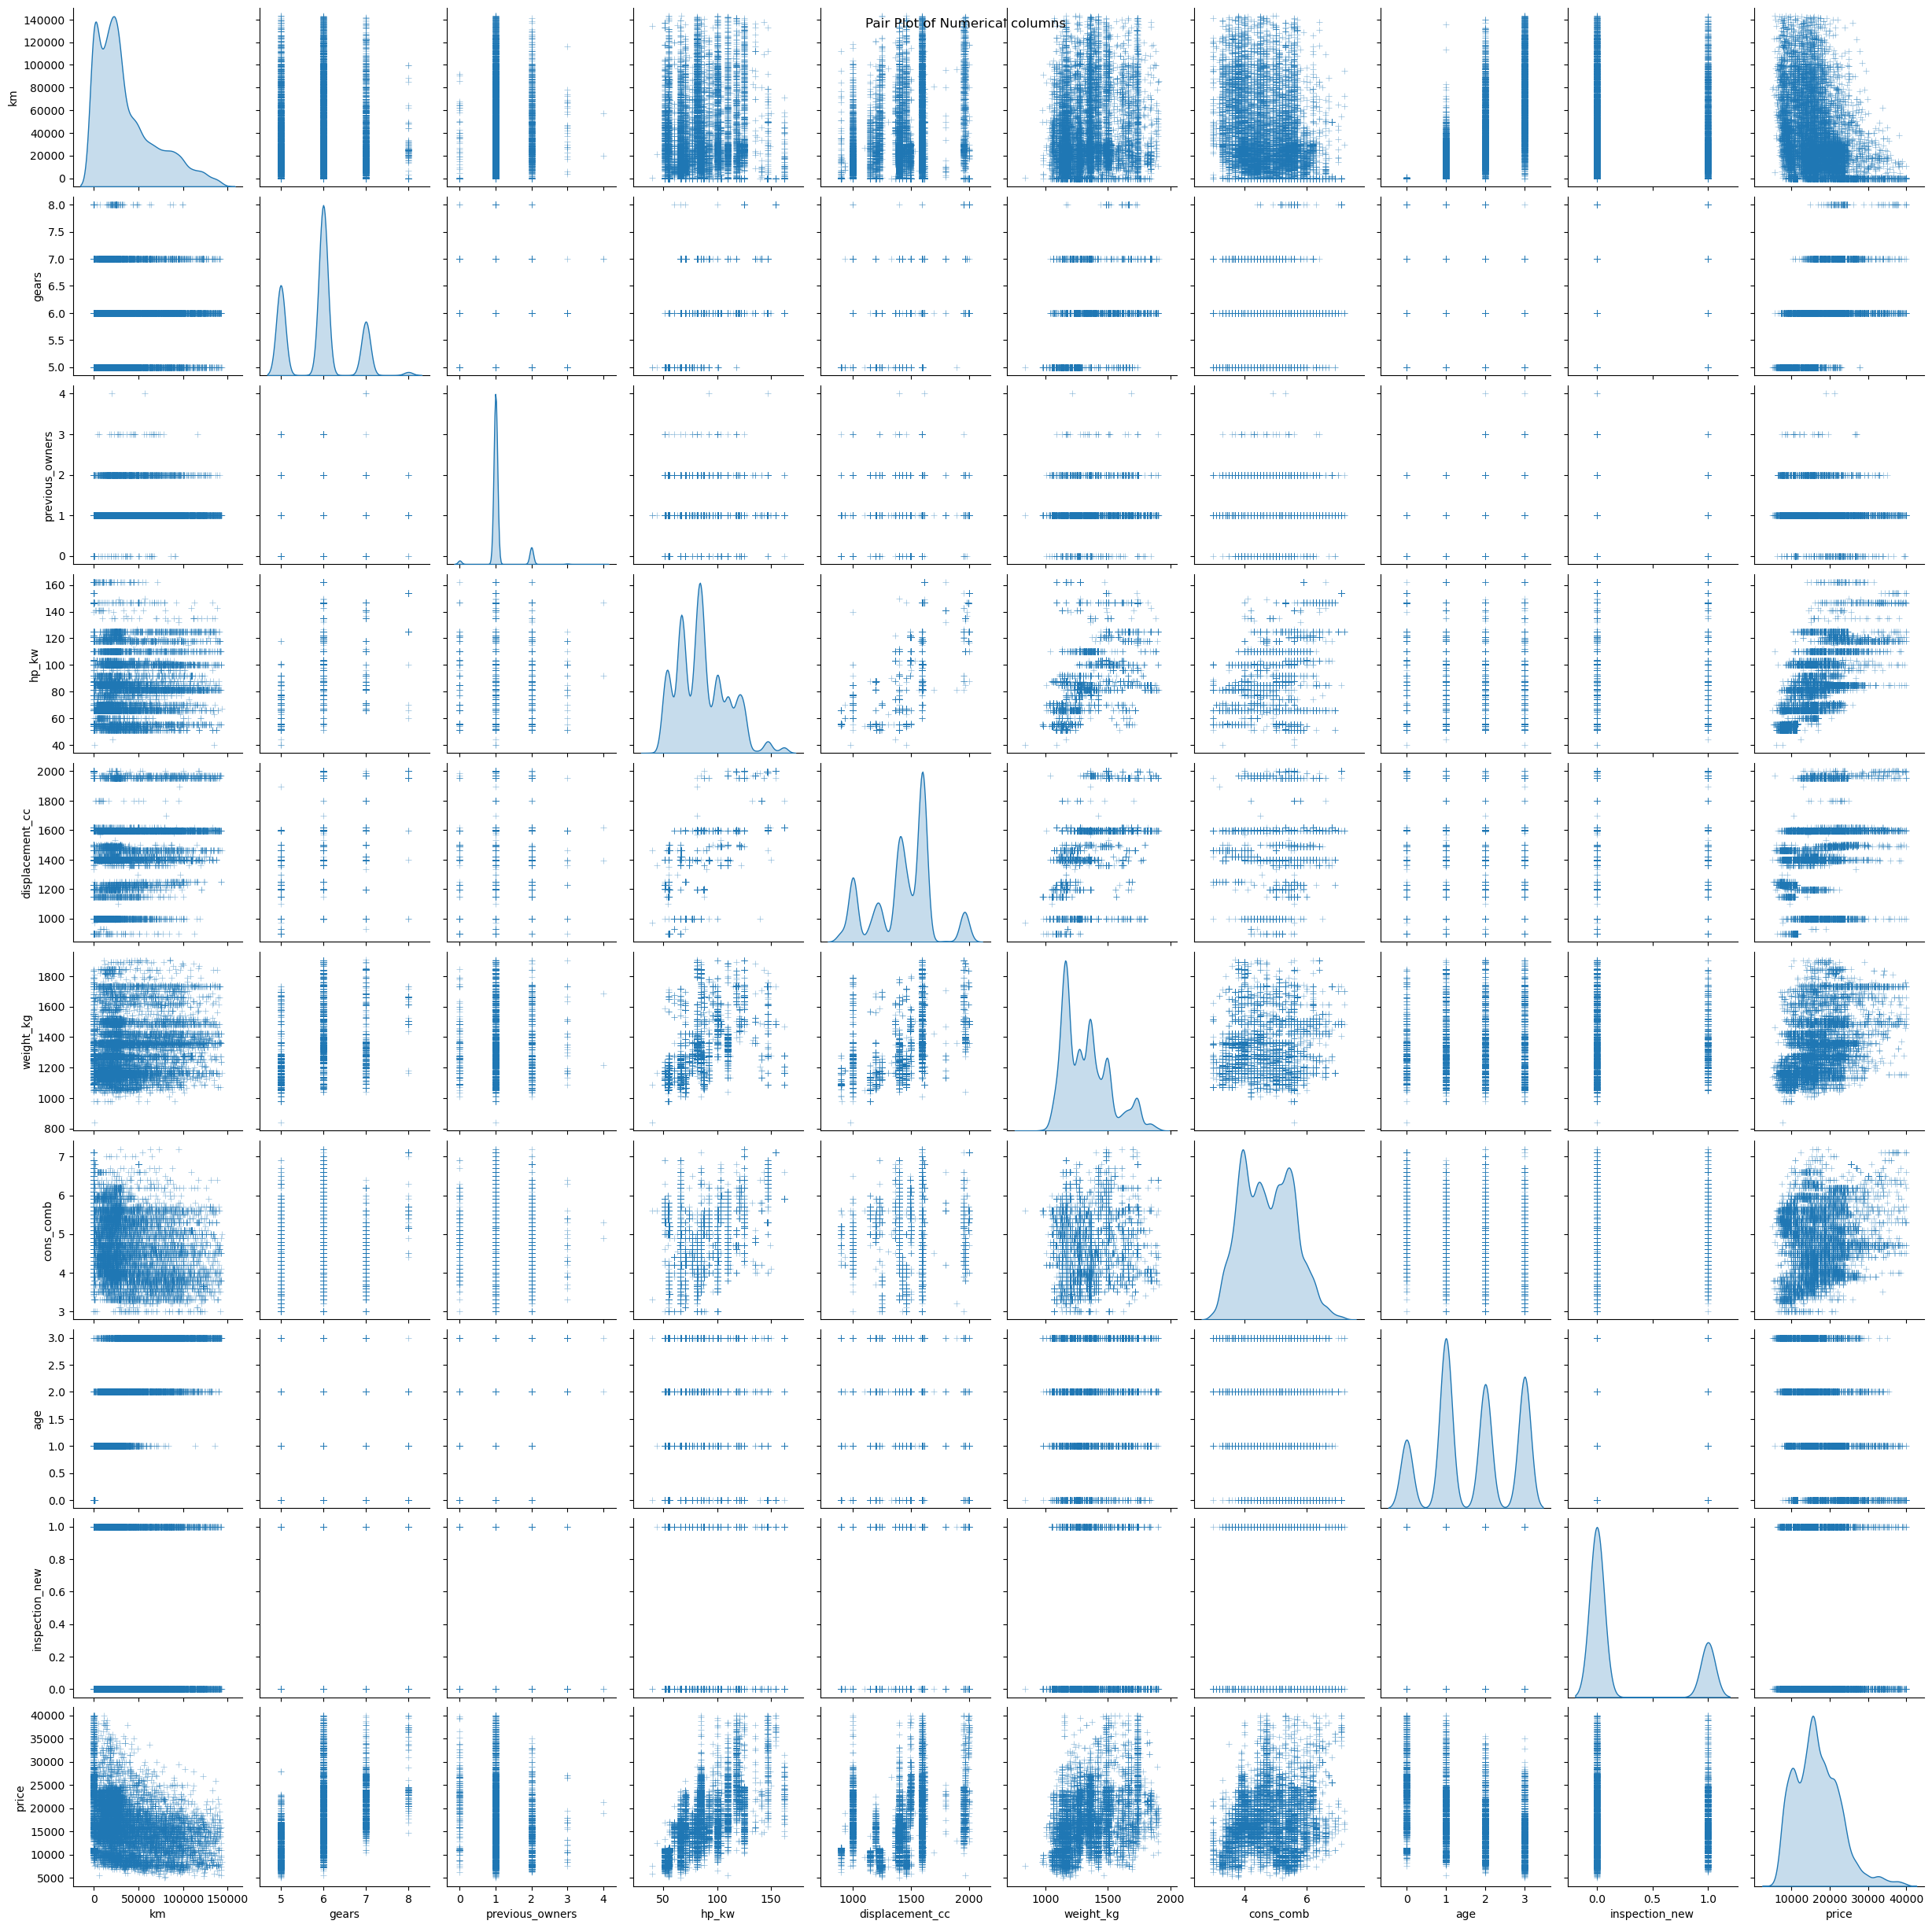

In [492]:
# Pair plot of all variables
plt.figure(figsize=(16, 16))
sns.pairplot(df_out[num_columns + target_column], diag_kind='kde', markers='+', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Numerical columns")
plt.show()

### **2.4 Feature Engineering** <font color = red> [11 marks] </font>

#### **2.4.1**
Fix any redundant columns and create new ones if needed.

In [494]:
# Fix/create columns as needed

# One hot encoding for categorical columns with single values

def one_hot_encode_columns(df, categorical_cols):
    """
    One-hot encodes specified categorical columns in the dataframe.

    Args:
        df (pd.DataFrame): Input dataframe
        categorical_cols (list): List of categorical column names to be one-hot encoded

    Returns:
        pd.DataFrame: Dataframe with one-hot encoded columns
    """
    df_encoded = df.copy()
    
    # One-hot encode specified categorical columns
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

    # Convert only boolean columns to int
    for col in df_encoded.select_dtypes('bool').columns:
        df_encoded[col] = df_encoded[col].astype('int64')
    
    return df_encoded


one_hot_cols=['make_model', 'body_type', 'vat', 'type', 'fuel', 'paint_type', 'upholstery_type', 'gearing_type', 'drive_chain']
df_encoded = one_hot_encode_columns(df_out, one_hot_cols)


In [495]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12777 entries, 0 to 15913
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              12777 non-null  int64  
 1   km                                 12777 non-null  float64
 2   gears                              12777 non-null  float64
 3   comfort_convenience                12777 non-null  object 
 4   entertainment_media                12777 non-null  object 
 5   extras                             12777 non-null  object 
 6   safety_security                    12777 non-null  object 
 7   age                                12777 non-null  float64
 8   previous_owners                    12777 non-null  float64
 9   hp_kw                              12777 non-null  float64
 10  inspection_new                     12777 non-null  int64  
 11  displacement_cc                    12777 non-null  float64


In [496]:
df_encoded.shape

(12777, 35)

#### **2.4.2** <font color =red> [4 marks] </font>
Analysis and feature engineering on `['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']`.

These columns contains lists of features present. Decide on how to include these features in the predictors.

In [498]:
# Check unique values in each feature spec column

# Create list of features from df where features are present in < 5% of cars

def get_common_multilabel_features(df, columns, threshold_percent=5):
    """
    For each multi-label categorical column:
    1. Split values by comma, convert to a pandasSeries where each row is a list of features
    2. Flatten all lists into a single list all_features, to count occurrence of each feature
    3. Keep only features present in >= threshold_percent of rows
    
    Returns a dictionary: {column_name: list_of_common_features}
    """
    common_features_dict = {}

    for col in columns:
        # Step 1: Split comma-separated strings into lists
        col_list = df[col].str.split(',').apply(lambda x: [item.strip() for item in x])
        
        # Flatten all lists to count features
        all_features = [item for sublist in col_list for item in sublist]
        feature_counts = Counter(all_features)
        
        # Step 2: Convert to percentage
        feature_freq = pd.DataFrame.from_dict(feature_counts, orient='index', columns=['count'])
        feature_freq['percentage'] = feature_freq['count'] / len(df) * 100
        
        # Step 3: Keep only features above threshold
        common_features = feature_freq[feature_freq['percentage'] >= threshold_percent].index.tolist()
        common_features_dict[col] = common_features
        
        print(f"{col}: {len(common_features)} features retained out of {len(feature_counts)} total")
    
    return common_features_dict

# Example usage:
multi_label_cols = ['comfort_convenience', 'entertainment_media', 'extras', 'safety_security']
common_features_dict = get_common_multilabel_features(df_encoded, multi_label_cols, threshold_percent=5)

# common_features is a dictionary mapping each column to the features to encode
from pprint import pprint
print("\nList of commonly used features retained in the columns:")
pprint(common_features_dict)



comfort_convenience: 26 features retained out of 38 total
entertainment_media: 9 features retained out of 10 total
extras: 8 features retained out of 17 total
safety_security: 27 features retained out of 29 total

List of commonly used features retained in the columns:
{'comfort_convenience': ['Air conditioning',
                         'Armrest',
                         'Automatic climate control',
                         'Cruise control',
                         'Electrical side mirrors',
                         'Hill Holder',
                         'Leather steering wheel',
                         'Light sensor',
                         'Multi-function steering wheel',
                         'Navigation system',
                         'Park Distance Control',
                         'Parking assist system sensors rear',
                         'Power windows',
                         'Rain sensor',
                         'Seat heating',
                         'St

#### **2.4.3** <font color =red> [3 marks] </font>
Perform feature encoding.

In [499]:
# Apply multi-hot encoding  MultiLabelBinarizer
# ['comfort_convenience', 'entertainment_media', 'extras', 'safety_security']

def multi_hot_encode_columns(df, multi_label_cols, common_features_dict):
    """
    Multi-hot encode multi-label columns using only common features.
    
    Args:
        df: pandas DataFrame
        multi_label_cols: list of multi-label column names
        common_features_dict: dict {col_name: list_of_common_features}
        
    Returns:
        df_encoded: original df with multi-hot columns concatenated (original columns dropped)
    """
    df_encoded = df.copy()
    
    for col in multi_label_cols:
        # Split and strip
        col_list = df[col].str.split(',').apply(lambda x: [item.strip() for item in x if item.strip() in common_features_dict[col]])    
 
        # Multi-hot encode using only common features
        mlb = MultiLabelBinarizer(classes=common_features_dict[col])
        encoded = pd.DataFrame(
            mlb.fit_transform(col_list),
            columns=[f"{col}_{feat}" for feat in mlb.classes_],
            index=df_encoded.index
        )
        
        # Concatenate encoded columns and drop original
        df_encoded = pd.concat([df_encoded, encoded], axis=1).drop(columns=[col])
    
    return df_encoded

# Example usage:
df_encoded = multi_hot_encode_columns(df_encoded, multi_label_cols, common_features_dict)

print("Encoded DataFrame shape:", df_encoded.shape)


Encoded DataFrame shape: (12777, 101)


In [500]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12777 entries, 0 to 15913
Columns: 101 entries, price to safety_security_Blind spot monitor
dtypes: float64(8), int64(93)
memory usage: 9.9 MB


#### **2.4.4** <font color =red> [2 marks] </font>
Split the data into training and testing sets.

In [502]:
# Split data

def split_dataset(df):
    X = df_encoded.drop(columns=['price'])
    y = df_encoded['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print (f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_dataset(df_encoded)

Shape of X_train: (10221, 100), y_train: (10221,), X_test: (2556, 100), y_test: (2556,)


#### **2.4.5** <font color =red> [2 marks] </font>
Scale the features.

Recommended workflow:

- Split your data into train and test sets.
- Fit the scaler (e.g., StandardScaler, MinMaxScaler) only on the training data.
- Transform both train and test sets using the scaler fitted on the training data.
- Use the scaled data for all your models.

Why?
- Scaling before splitting can cause data leakage, leading to overly optimistic model performance.
- Scaling after splitting ensures fair and realistic evaluation for all models.

When to use StandardScaler vs MinMaxScalar:
- Standard
    - Most features are continuous and roughly bell-shaped (normal distribution).
    - You are using models that assume standardized data (linear regression, logistic regression, SVM, etc.).
    - You want to handle outliers more robustly (StandardScaler is less sensitive than MinMaxScaler).
- MinMaxScaler:
    - Your features have a known, fixed range and you want to scale everything to [0, 1].
    - You are using models that are sensitive to the scale of input (e.g., neural networks).
    - Your data does not have extreme outliers.

In [503]:
# Scale features
#from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scale_features(X_train, X_test, scaler_type='standard'):
    """
    Scales features using StandardScaler or MinMaxScaler.

    Args:
        X_train (pd.DataFrame): Training features
        X_test (pd.DataFrame): Test features
        scaler_type (str): 'standard' for StandardScaler, 'minmax' for MinMaxScaler

    Returns:
        X_train_scaled, X_test_scaled, scaler
    """
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("scaler_type must be 'standard' or 'minmax'")

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler


X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test, scaler_type='standard')
print(f"Shape of X_train_scaled, X_test_scaled : {X_train_scaled.shape}, {X_test_scaled.shape}")


Shape of X_train_scaled, X_test_scaled : (10221, 100), (2556, 100)


## **3 Linear Regression Models** <font color =red> [35 marks] </font>


### **3.1 Baseline Linear Regression Model** <font color =red> [10 marks] </font>

#### **3.1.1** <font color =red> [5 marks] </font>
Build and fit a basic linear regression model. Perform evaluation using suitable metrics.

In [504]:
# Initialise and train model
def baseline_linear_model(X_train_scaled, X_test_scaled, y_train):
    """baseline_linear_model fits a LinearRegression on the scaled training data and returns predictions for both train and test sets."""
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    y_train_pred = lr.predict(X_train_scaled)
    y_test_pred  = lr.predict(X_test_scaled)

    return lr, y_train_pred, y_test_pred
lr, y_train_pred, y_test_pred = baseline_linear_model(X_train_scaled, X_test_scaled, y_train)

In [505]:
lr_coeff = pd.DataFrame({
    'feature'  : X_train.columns,
    'coef'     : lr.coef_,
    'coef_abs' : np.abs(lr.coef_),
    'sign'     : np.where(lr.coef_>0, "+", "-")  
}).sort_values(by='coef_abs', ascending=False)

# Display top N positive and negative coefficients
print("-"*75)
print("Top 10 Coefficients with sign")
print("-"*75)
display(lr_coeff.head(10))
print("-"*75)
print("Bottom 10 Coefficients with sign")
print("-"*75)
display(lr_coeff.tail(10))

---------------------------------------------------------------------------
Top 10 Coefficients with sign
---------------------------------------------------------------------------


feature         coef     coef_abs sign
12      make_model_Opel Corsa -1873.558987  1873.558987    -
4                       hp_kw  1786.336836  1786.336836    +
14    make_model_Renault Clio -1730.773717  1730.773717    -
11      make_model_Opel Astra -1268.098820  1268.098820    -
0                          km -1215.942717  1215.942717    -
2                         age -1195.504940  1195.504940    -
27        gearing_type_Manual  -807.496099   807.496099    -
15  make_model_Renault Espace   784.069910   784.069910    +
22                  type_Used  -710.314486   710.314486    -
10         make_model_Audi A3   676.506593   676.506593    +

---------------------------------------------------------------------------
Bottom 10 Coefficients with sign
---------------------------------------------------------------------------


feature          coef  \
3                                     previous_owners -1.856752e+01   
57           entertainment_media_Hands-free equipment  1.802845e+01   
38  comfort_convenience_Multi-function steering wheel  1.383052e+01   
89                       safety_security_Alarm system -1.140505e+01   
58              entertainment_media_On-board computer -8.433080e+00   
42                  comfort_convenience_Power windows -7.806964e+00   
53  comfort_convenience_Electrically adjustable seats  4.584537e+00   
8                                           cons_comb  4.470476e+00   
51  comfort_convenience_Electrically heated windsh...  4.345203e+00   
9                                  make_model_Audi A2 -4.547474e-13   

        coef_abs sign  
3   1.856752e+01    -  
57  1.802845e+01    +  
38  1.383052e+01    +  
89  1.140505e+01    -  
58  8.433080e+00    -  
42  7.806964e+00    -  
53  4.584537e+00    +  
8   4.470476e+00    +  
51  4.345203e+00    +  
9   4.547474e-13    -

In [508]:
# Evaluate the model's performance

def analyze_model_performance(y_train, y_train_pred, y_test, y_test_pred):
    """analyze_model_performance computes and displays common regression metrics for both train and test predictions in a DataFrame."""
    def analyze_model_scores(y_act, y_prd):
        r2 = r2_score(y_act, y_prd)
        mse = mean_squared_error(y_act, y_prd)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_act, y_prd)
        mape = mean_absolute_percentage_error(y_act, y_prd)

        var = y_act.var()
        std = y_act.std()
        mean_val = y_act.mean()

        return rmse, std, mse, var, mae, mean_val, mape, r2

    rmse_train, std_train, mse_train, var_train, mae_train, mean_val_train, mape_train, r2_train = analyze_model_scores(y_train, y_train_pred)
    rmse_test, std_test, mse_test, var_test, mae_test, mean_val_test, mape_test, r2_test = analyze_model_scores(y_test, y_test_pred)

    results = pd.DataFrame({
                    'dataset' : ['Training', 'Test'],
                    'rmse' : [rmse_train, rmse_test],
                    'std' : [std_train, std_test],
                    'mse' : [mse_train, mse_test],
                    'var' : [var_train, var_test],
                    'mae' : [mae_train, mae_test],
                    'mean': [mean_val_train, mean_val_test],
                    'mape': [mape_train, mape_test],
                    'r2' : [r2_train, r2_test]
    })

    display(results)
    return results

print("-"*75)
print("Analyze Model Performance – Baseline Linear Regression")
print("-"*75)
baseline_model_results = analyze_model_performance(y_train, y_train_pred, y_test, y_test_pred)



---------------------------------------------------------------------------
Analyze Model Performance – Baseline Linear Regression
---------------------------------------------------------------------------


dataset         rmse          std           mse           var  \
0  Training  1916.395641  5964.193905  3.672572e+06  3.557161e+07   
1      Test  1927.425144  5953.809415  3.714968e+06  3.544785e+07   

           mae          mean      mape        r2  
0  1339.295942  16687.750807  0.088136  0.896745  
1  1326.169542  16695.843505  0.086239  0.895158

**Analysis of baseline model**
 - rmse < std: Good. Your model’s error is less than the standard deviation of the actual values, meaning it’s better than just predicting the mean.
- mse < var for train and test: Good. The model’s mean squared error is less than the variance of the actuals, indicating it’s capturing signal.
- mae < mean for train and test: Good. The average error is much less than the average value, so your predictions are reasonably close.
- r2 > 0.89 for both and close: Very good. High and similar R² on train and test means your model is both accurate and generalizes well.

**Summary:**
- model is performing well overall.
- Keep an eye on the gap between train and test metrics; if it grows, consider regularization or more data.

#### **3.1.2** <font color =red> [5 marks] </font>
Analyse residuals and check other assumptions of linear regression.

Check for linearity by analysing residuals vs predicted values

Baseline Model - Plot of Residuals vs Predicted


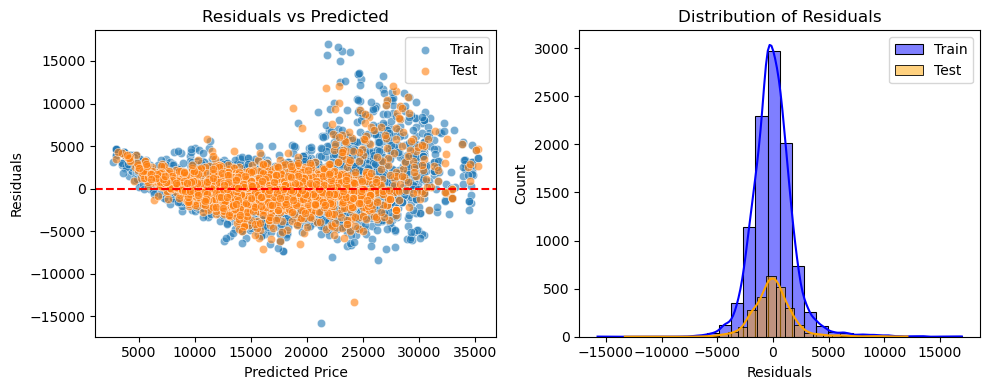

In [509]:
# Linearity check: Plot residuals vs fitted values

def plot_residuals_vs_predicted(y_train, y_train_pred, y_test, y_test_pred):

    # residuals is actual - prediction value
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred

    fig, axes = plt.subplots(1, 2, figsize = (10, 4))

    # Residuals vs predicted target values 
    sns.scatterplot(x = y_train_pred, y = residuals_train, ax = axes[0], label = 'Train', alpha = 0.6)
    sns.scatterplot(x = y_test_pred, y = residuals_test, ax = axes[0], label = 'Test', alpha = 0.6)
    axes[0].axhline(0, color = 'red', linestyle = '--'); axes[0].set_xlabel('Predicted Price'); axes[0].set_ylabel('Residuals'); axes[0].set_title('Residuals vs Predicted'); axes[0].legend()

    # Residuals distribution 
    sns.histplot(residuals_train, kde = True, bins = 30, ax = axes[1], color = 'blue', label = 'Train', alpha = 0.5)
    sns.histplot(residuals_test, kde = True, bins = 30, ax = axes[1], color = 'orange', label = 'Test', alpha = 0.5)
    axes[1].set_xlabel('Residuals'); axes[1].set_title('Distribution of Residuals'); axes[1].legend(); plt.tight_layout()

print(f"Baseline Model - Plot of Residuals vs Predicted")
plot_residuals_vs_predicted(y_train, y_train_pred, y_test, y_test_pred)


Check normality in residual distribution

In [ ]:
# Check the normality of residuals by plotting their distribution

# Done above

Check multicollinearity using Variance Inflation Factor (VIF) and handle features with high VIF.

What:
- Creates a DataFrame to store VIF results.
- For each feature (including the constant), calculates the Variance Inflation Factor (VIF) using variance_inflation_factor.
- VIF measures how much a feature is linearly predicted by the other features (i.e., multicollinearity).

How VIF works:
- For each feature, it fits a regression model predicting that feature from all the others.
- VIF = 1 / (1 - R²) from that regression.
- High VIF (>5 or >10) means the feature is highly collinear with others

In [511]:
# Check for multicollinearity and handle

def check_multicollinearity(X_train):
    """
    Check multicollinearity using Variance Inflation Factor (VIF).
    VIF measures how much a feature is linearly predicted by the other features (i.e., multicollinearity).
    A VIF > 5 indicates a potential multicollinearity problem.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # Add intercept for VIF calculation - Adds a column of ones (called the "constant" or "intercept") to your features.
    # Why: Many statistical models (like OLS regression) require an explicit intercept term. 
    # The VIF calculation also expects this, so we add it to ensure correct results.
    X_vif = X_train.copy()
    X_vif['intercept'] = 1

    # For each feature (including the constant), calculates the Variance Inflation Factor (VIF) using variance_inflation_factor.
    vif_data = pd.DataFrame()
    vif_data['features'] = X_vif.columns
    vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

    vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif_data

vif_df = check_multicollinearity(X_train)
print("Variance Inflation Factor (VIF) for features:")
display(vif_df.head(20))  # Display top 20 features with highest VIF

Variance Inflation Factor (VIF) for features:


features         VIF
0                                           intercept  898.164917
1                           make_model_Renault Espace    9.197915
2                                               hp_kw    7.419921
3                                         fuel_Diesel    7.367117
4                            make_model_Opel Insignia    7.200831
5                                     displacement_cc    6.629169
6                                       body_type_Van    6.370844
7                               make_model_Opel Corsa    5.516246
8                                           weight_kg    5.094156
9   comfort_convenience_Parking assist system sens...    4.976697
10                            body_type_Station wagon    4.667394
11                                          cons_comb    4.528100
12                              make_model_Opel Astra    4.451727
13          comfort_convenience_Park Distance Control    4.179142
14                                                age    3.959336
15                                 make_model_Audi A3    3.885996
16                            make_model_Renault Clio    3.836322
17                                              gears    3.171619
18                                          type_Used    3.069647
19          comfort_convenience_Heated steering wheel    2.910976

**Interpretation**
- VIF < 5 → Fine
- 5 ≤ VIF < 10 → Moderate multicollinearity, keep an eye
- VIF ≥ 10 → Strong multicollinearity, consider fixing

| Feature                                     | VIF  | Interpretation                                                                                          |
|---------------------------------------------|------|----------------------------------------------------------------------------------------------------------|
| intercept                                   | 898  | Ignore. Intercept often has artificially high VIF and doesn’t affect feature decisions.                  |
| make_model_Renault Espace                   | 9.19 | High. Likely overlaps with body_type (Van) and maybe weight_kg.                                          |
| hp_kw                                       | 7.41 | High. Horsepower is highly correlated with displacement_cc and weight_kg.                                |
| fuel_Diesel                                 | 7.36 | High. Fuel type interacts with body_type and consumption (cons_comb).                                    |
| make_model_Opel Insignia                    | 7.20 | High. Strongly collinear with other Opel models + body types.                                            |
| displacement_cc                             | 6.62 | Multicollinear with hp_kw (both capture engine size/power).                                               |
| body_type_Van                               | 6.37 | Overlaps with Renault Espace (most Espace are vans) → redundancy.                                        |
| make_model_Opel Corsa                       | 5.51 | Moderate collinearity, probably with other Opel models.                                                  |
| weight_kg                                   | 5.10 | Correlated with hp_kw and displacement_cc. Bigger engines = heavier cars.                                |
| comfort_convenience_Parking assist…         | 4.98 | Moderate. Likely overlaps with other comfort features (Park Distance Control).                           |
| body_type_Station wagon                     | 4.66 | Overlaps with specific models (Opel Astra wagon, Renault Espace).                                        |
| cons_comb                                   | 4.52 | Correlated with engine size (displacement_cc, hp_kw).                                                     |
| make_model_Opel Astra                       | 4.45 | Model dummies always show collinearity with body_type & brand group.                                     |
| comfort_convenience_Park Distance Control   | 4.18 | Redundant with Parking assist system sensors.                                                            |
| age                                         | 3.96 | Low–moderate. Correlates slightly with km (which you probably dropped earlier due to multicollinearity). |
| make_model_Audi A3                          | 3.89 | Fine, moderate. Captures brand-specific pricing.                                                          |
| make_model_Renault Clio                     | 3.83 | Acceptable. Still collinear with Renault brand dummies.                                                   |
| gears                                       | 3.17 | Acceptable. Correlates with hp_kw (higher performance cars → more gears).                                |
| type_Used                                   | 3.06 | Acceptable. Correlates slightly with age and km.                                                         |
| comfort_convenience_Rain sensor             | 2.91 | Low, no issue.                                                                                           |
                                                              |


### **3.2 Ridge Regression Implementation** <font color =red> [10 marks] </font>

#### **3.2.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [512]:
# List of alphas to tune for Ridge regularisation

alpha_range = [0.01, 0.1, 1, 10, 50, 100, 200, 300, 400, 500]

#### **3.2.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [513]:
# Applying Ridge regression
def ridgecv_model(X_train_scaled, X_test_scaled, y_train, alpha_range):
    """
    Fits a RidgeCV model to the training data and returns predictions for both train and test sets.
    Also returns the chosen alpha value.

    Args:
        X_train_scaled (np.array): Scaled training features
        X_test_scaled (np.array): Scaled test features
        y_train (pd.Series): Training target
        alpha_range (list): List of alpha values to try
    Returns:
        ridge (RidgeCV): Fitted RidgeCV model
        y_train_ridge_pred (np.array): Predictions on training set
        y_test_ridge_pred (np.array): Predictions on test set
    """
    # cv=5 is same as default KFold(n_splits=5, shuffle=False)
    # cv=KFold(n_splits=5, shuffle=True, random_state=42) => This explicitly creates a KFold cross-validator with 5 splits, 
    # shuffling the data before splitting, especially needed if your dataset is ordered
    # shuffle=True randomizes the order of the data before splitting
    # random_state=42 ensures reproducibility (the same splits every time you run)
    
    ridge = RidgeCV(alphas=alpha_range, scoring="neg_mean_absolute_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
    ridge.fit(X_train_scaled, y_train)
    y_train_ridge_pred = ridge.predict(X_train_scaled)
    y_test_ridge_pred = ridge.predict(X_test_scaled)

    return ridge, y_train_ridge_pred, y_test_ridge_pred

ridge, y_train_ridge_pred, y_test_ridge_pred = ridgecv_model(X_train_scaled, X_test_scaled, y_train, alpha_range)



RidgeCV Model - Analyze Model Performance


dataset         rmse          std           mse           var  \
0  Training  1918.045885  5964.193905  3.678900e+06  3.557161e+07   
1      Test  1927.496661  5953.809415  3.715243e+06  3.544785e+07   

           mae          mean      mape        r2  
0  1337.148364  16687.750807  0.087747  0.896568  
1  1323.690419  16695.843505  0.085888  0.895150

RidgeCV Model - Plot of Residuals vs Predicted


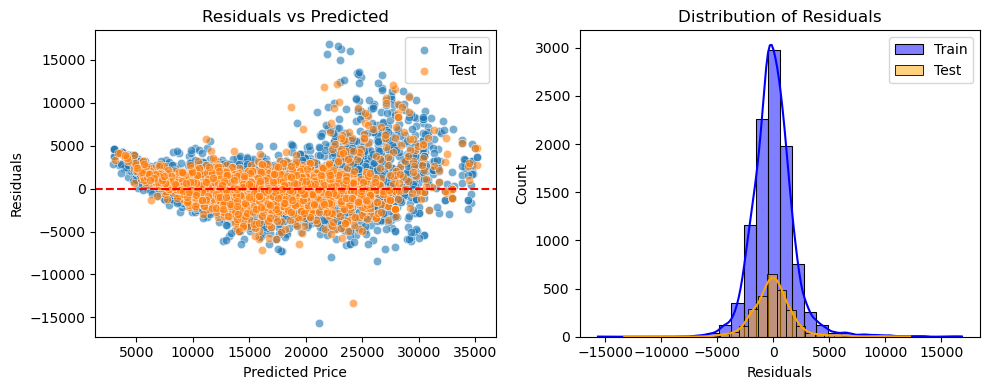

In [514]:
# Analyze model performance
print(f"RidgeCV Model - Analyze Model Performance")
ridge_results = analyze_model_performance(y_train, y_train_ridge_pred, y_test, y_test_ridge_pred)
print(f"RidgeCV Model - Plot of Residuals vs Predicted")
plot_residuals_vs_predicted(y_train, y_train_ridge_pred, y_test, y_test_ridge_pred)

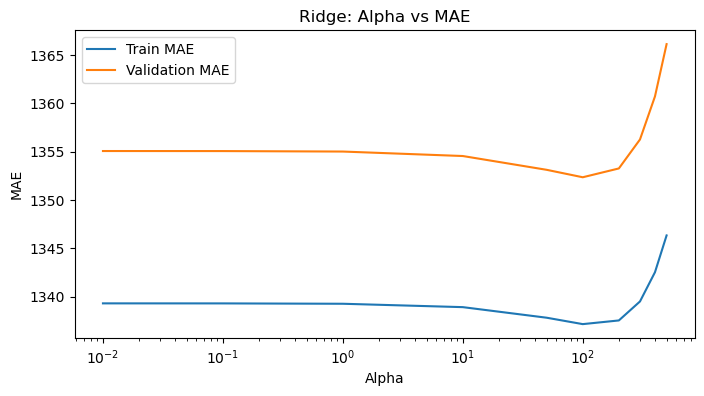

In [515]:
# Plot train and test scores against alpha
#from sklearn.model_selection import cross_val_score

# The reason the code uses Ridge inside the loop is because RidgeCV doesn’t expose per-alpha train/val scores for plotting. 
# It only gives you the final chosen alpha and fitted coefficients.
# So if you want to visualize how MAE changes across alphas, you have to do it manually with Ridge.

def plot_alpha_vs_score(X_train_scaled, y_train, alpha_range):
    train_scores = []
    val_scores = []
    for alpha in alpha_range:
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train_scaled, y_train)
        train_scores.append(mean_absolute_error(y_train, ridge.predict(X_train_scaled)))
        # use CV for val score
        val_score = -cross_val_score(Ridge(alpha=alpha), X_train_scaled, y_train,
                                     scoring="neg_mean_absolute_error", cv=5).mean()
        val_scores.append(val_score)

    plt.figure(figsize=(8,4))
    plt.plot(alpha_range, train_scores, label="Train MAE")
    plt.plot(alpha_range, val_scores, label="Validation MAE")
    plt.xscale("log")
    plt.xlabel("Alpha")
    plt.ylabel("MAE")
    plt.title("Ridge: Alpha vs MAE")
    plt.legend()
    plt.show()
    
plot_alpha_vs_score(X_train_scaled, y_train, alpha_range)

Find the best alpha value.

In [518]:
# Best alpha value
print("-"*75)
print("Chosen alpha (Ridge):", ridge.alpha_)
coef_ridge = pd.Series(ridge.coef_, index=X_train.columns)
print("-"*75)


---------------------------------------------------------------------------
Chosen alpha (Ridge): 100.0
---------------------------------------------------------------------------


We will get some best value of alpha above. This however is not the most accurate value but the best value from the given list. Now we have a rough estimate of the range that best alpha falls in. Let us do another iteration over the values in a smaller range.

#### **3.2.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [519]:
# Take a smaller range of alpha to test
narrow_alpha_range = np.linspace(90, 120, 30)   # 30 values between 90 and 120
#narrow_alpha_range = np.logspace(0, 2, 50)   # alphas between 1 and 100, 50 values

Final RidgeCV Model - Analyze Model Performance


dataset         rmse          std           mse           var  \
0  Training  1918.382376  5964.193905  3.680191e+06  3.557161e+07   
1      Test  1927.690605  5953.809415  3.715991e+06  3.544785e+07   

           mae          mean      mape        r2  
0  1337.096922  16687.750807  0.087718  0.896531  
1  1323.564053  16695.843505  0.085860  0.895129

Final RidgeCV Model - Plot of Residuals vs Predicted
Best RidgeCV Model Score (Negative MAE): 1323.5640531766749
Best RidgeCV Model Alpha: 110.6896551724138


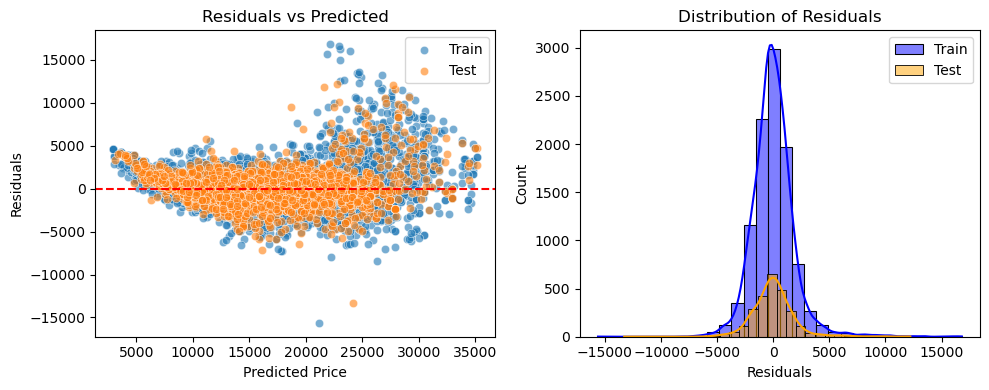

In [520]:
# Applying Ridge regression
# Best alpha value
# Best score (negative MAE)

def find_best_alpha(X_train_scaled, X_test_scaled, y_train, alpha_range):
    ridge, y_train_ridge_pred, y_test_ridge_pred = ridgecv_model(X_train_scaled, X_test_scaled, y_train, alpha_range)

    print(f"Final RidgeCV Model - Analyze Model Performance")
    ridge_results = analyze_model_performance(y_train, y_train_ridge_pred, y_test, y_test_ridge_pred)
    print(f"Final RidgeCV Model - Plot of Residuals vs Predicted")
    plot_residuals_vs_predicted(y_train, y_train_ridge_pred, y_test, y_test_ridge_pred)

    # Best score (negative MAE)
    best_score = ridge_results.loc[ridge_results["dataset"] =='Test']['mae'].values[0]
    print(f"Best RidgeCV Model Score (Negative MAE): {best_score}")
    best_alpha = ridge.alpha_
    print(f"Best RidgeCV Model Alpha: {best_alpha}")

    return ridge, y_train_ridge_pred, y_test_ridge_pred, best_alpha, best_score

ridge, y_train_ridge_pred, y_test_ridge_pred, best_ridge_alpha, best_ridge_score= find_best_alpha(X_train_scaled, X_test_scaled, y_train, narrow_alpha_range)



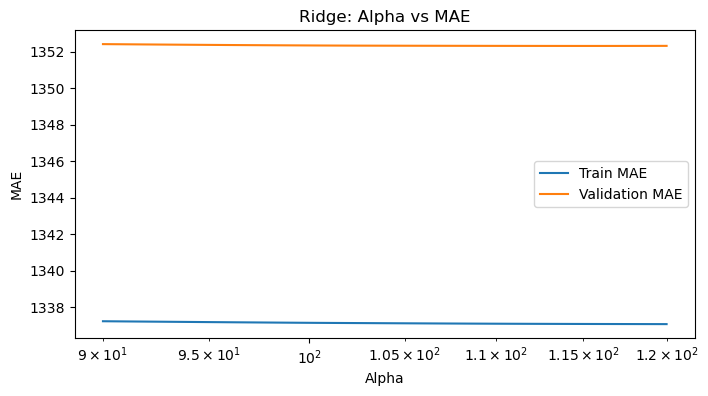

In [521]:
# Plot train and test scores against alpha


plot_alpha_vs_score(X_train_scaled, y_train, narrow_alpha_range)


Plot the error-alpha graph again and find the actual optimal value for alpha.

In [526]:
# Set best alpha for Ridge regression
# Fit the Ridge model to get the coefficients of the fitted model
print("-"*75)
print(f"Final Ridge Model Coefficients with best score alpha={best_ridge_alpha}:")
coef_ridge = pd.Series(ridge.coef_, index=X_train.columns)
print("-"*75)


---------------------------------------------------------------------------
Final Ridge Model Coefficients with best score alpha=110.6896551724138:
---------------------------------------------------------------------------


In [527]:
# Show the coefficients for each feature
ridge_coeff = pd.DataFrame({
    'feature'  : X_train.columns,
    'coef'     : ridge.coef_,
    'coef_abs' : np.abs(ridge.coef_),
    'sign'     : np.where(ridge.coef_>0, "+", "-")  
}).sort_values(by='coef_abs', ascending=False)

# Display top N positive and negative coefficients
print("-"*75)
print("Top 10 Coefficients with sign")
print("-"*75)
display(ridge_coeff.head(10))
print("-"*75)
print("Bottom 10 Coefficients with sign")
print("-"*75)
display(ridge_coeff.tail(10))


---------------------------------------------------------------------------
Top 10 Coefficients with sign
---------------------------------------------------------------------------


feature         coef     coef_abs sign
12      make_model_Opel Corsa -1767.951299  1767.951299    -
4                       hp_kw  1702.835831  1702.835831    +
14    make_model_Renault Clio -1609.584789  1609.584789    -
0                          km -1204.063414  1204.063414    -
2                         age -1191.240143  1191.240143    -
11      make_model_Opel Astra -1155.893700  1155.893700    -
15  make_model_Renault Espace   804.014732   804.014732    +
27        gearing_type_Manual  -799.542647   799.542647    -
22                  type_Used  -709.050511   709.050511    -
10         make_model_Audi A3   701.383551   701.383551    +

---------------------------------------------------------------------------
Bottom 10 Coefficients with sign
---------------------------------------------------------------------------


feature       coef   coef_abs  \
44                   comfort_convenience_Seat heating -18.511696  18.511696   
92                safety_security_Adaptive headlights -18.509674  18.509674   
38  comfort_convenience_Multi-function steering wheel  15.906676  15.906676   
57           entertainment_media_Hands-free equipment  11.115811  11.115811   
89                       safety_security_Alarm system -10.672150  10.672150   
67                               extras_Voice Control -10.198033  10.198033   
42                  comfort_convenience_Power windows  -9.033585   9.033585   
53  comfort_convenience_Electrically adjustable seats   5.315421   5.315421   
51  comfort_convenience_Electrically heated windsh...   4.060606   4.060606   
9                                  make_model_Audi A2   0.000000   0.000000   

   sign  
44    -  
92    -  
38    +  
57    +  
89    -  
67    -  
42    -  
53    +  
51    +  
9     -

In [528]:
# Evaluate the Ridge model on the test data

print("Final Test Evaluation:")
print(f"R²: {r2_score(y_test, y_test_ridge_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_ridge_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_test_ridge_pred):.2f}")


Final Test Evaluation:
R²: 0.8951
MAE: 1323.56
MSE: 3715991.07


### **3.3 Lasso Regression Implementation** <font color =red> [10 marks] </font>

#### **3.3.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [529]:
# List of alphas to tune for Lasso regularisation

alphas_range = [ 0.01, 0.1, 1, 10, 50, 100]

#### **3.3.2** <font color =red> [4 marks] </font>
Apply Lasso Regularisation and find the best value of alpha from the list

In [541]:
# Initialise Lasso regression model
def lasso_model_tuning(X_train_scaled, X_test_scaled, y_train, y_test, alpha_range):
    """
    Fits Lasso models for a range of alpha values and returns train and test MSE scores
    along with the number of features used (non-zero coefficients) for each alpha.
    We will compare this with the best alpha coming from LassoCV. Since LassoCV uses MSE 
    by default for hypertuning, we will use the same here.
    """
    train_scores = []
    test_scores = []
    n_features = []
    for alpha_val in alpha_range:
        lasso = Lasso(alpha=alpha_val)
        lasso.fit(X_train_scaled, y_train)

        #print(f"Alpha: {alpha_val}, Number of features used: {np.sum(lasso.coef_ != 0)}")
        y_train_lasso_pred = lasso.predict(X_train_scaled)
        y_test_lasso_pred = lasso.predict(X_test_scaled)

        #train_scores.append(mean_absolute_error(y_train, y_train_lasso_pred))
        #test_scores.append(mean_absolute_error(y_test, y_test_lasso_pred))
        train_scores.append(mean_squared_error(y_train, y_train_lasso_pred))
        test_scores.append(mean_squared_error(y_test, y_test_lasso_pred))
        n_features.append(np.sum(lasso.coef_ != 0)) # number of features used

#       train_scores.append(-cross_val_score(lasso, X_train_scaled, y_train,
#                                     scoring="neg_mean_squared_error", cv=5).mean())

    return lasso, train_scores, test_scores, n_features

lasso, train_scores, test_scores, n_features = lasso_model_tuning(X_train_scaled, X_test_scaled, y_train, y_test, alphas_range)    


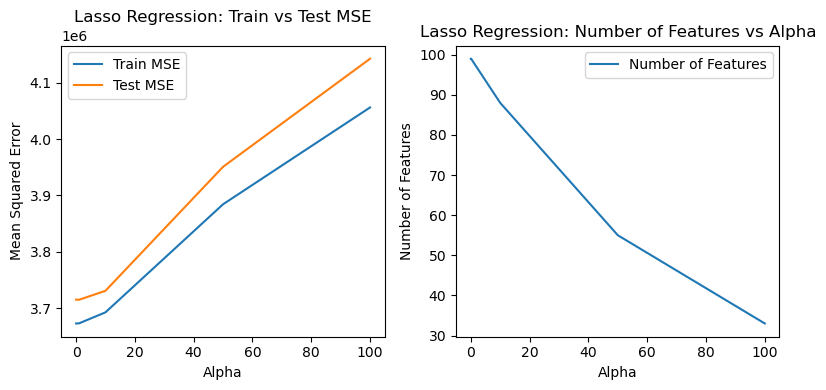

In [ ]:
# Plot train and test scores against alpha

def plot_lasso_alpha_vs_score(alpha_range, train_scores, test_scores, n_features):
    """
    Plots the training and testing MSE scores against alpha values for Lasso regression.
    Also plots the number of features used against alpha values.

    Args:
        alpha_range (list): List of alpha values
    """
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1) #n_rows, n_cols, index
    sns.lineplot(x=alpha_range, y=train_scores, label="Train MSE")
    sns.lineplot(x=alpha_range, y=test_scores, label="Test MSE")
    plt.xlabel("Alpha")
    plt.ylabel("Mean Squared Error")
    plt.title("Lasso Regression: Train vs Test MSE")
    plt.subplot(1, 2, 2) #n_rows, n_cols, index
    sns.lineplot(x=alpha_range, y=n_features, label="Number of Features")
    plt.xlabel("Alpha")
    plt.ylabel("Number of Features")
    plt.title("Lasso Regression: Number of Features vs Alpha")
    plt.tight_layout()
    plt.show()

plot_lasso_alpha_vs_score(alphas_range, train_scores, test_scores, n_features)



In [532]:
# Chosen/ Best alpha value

chosen_alpha_lasso = alphas_range[np.argmin(test_scores)]
print(f"We use min Test MSE, to compare with LassoCV later which by default uses MSE")
print("Chosen alpha (Lasso):", chosen_alpha_lasso)
print(f"Chosen alpha (Lasso) with minimum Test MSE: {chosen_alpha_lasso}, Test MSE: {min(test_scores)}")

We use min Test MSE, to compare with LassoCV later which by default uses MSE
Chosen alpha (Lasso): 1
Chosen alpha (Lasso) with minimum Test MSE: 1, Test MSE: 3714657.239348934


#### **3.3.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [542]:
# List of alphas to tune for Lasso regularization
narrow_alpha_range = np.linspace(0.005, 7, 30)   # 30 values between 0.005 and 10


In [543]:
# Tuning Lasso hyperparameters

def lassocv_model(X_train_scaled, X_test_scaled, y_train, alpha_range):
    """
    Fits a LassoCV model to the training data and returns predictions for both train and test sets.
    Also returns the chosen alpha value.

    Args:
        X_train_scaled (np.array): Scaled training features
    """
    # There is no scoring parameter in LassoCV, it uses MSE by default
    # cv=5 is same as default KFold(n_splits=5, shuffle=False)
    # cv=KFold(n_splits=5, shuffle=True, random_state=42)
    # shuffle=True randomizes the order of the data before splitting
    # random_state=42 ensures reproducibility (the same splits every time you run)

    lassocv = LassoCV(alphas=alpha_range, cv=KFold(n_splits=5, shuffle=True, random_state=42))
    lassocv.fit(X_train_scaled, y_train)
    y_train_lasso_pred = lassocv.predict(X_train_scaled)
    y_test_lasso_pred = lassocv.predict(X_test_scaled)
    best_alpha = lassocv.alpha_
    best_score_mae = mean_absolute_error(y_test, y_test_lasso_pred)
    best_score_mse = mean_squared_error(y_test, y_test_lasso_pred)
    print(f"Chosen alpha (using LassoCV): {best_alpha}")
    return lassocv, y_train_lasso_pred, y_test_lasso_pred, best_alpha, best_score_mae, best_score_mse

Chosen alpha (using LassoCV): 1.934655172413793
Final LassoCV Model - Analyze Model Performance


dataset         rmse          std           mse           var  \
0  Training  1916.608299  5964.193905  3.673387e+06  3.557161e+07   
1      Test  1927.318327  5953.809415  3.714556e+06  3.544785e+07   

           mae          mean      mape        r2  
0  1338.192484  16687.750807  0.088027  0.896723  
1  1325.045784  16695.843505  0.086150  0.895170

Final LassoCV Model - Plot of Residuals vs Predicted
Best LassoCV Model Alpha: 1.934655172413793
Best LassoCV Model Score (Negative MSE): -3714555.9329639934 for Alpha 1.934655172413793
Best LassoCV Model Score (Negative MAE): -1325.0457843719294 for Alpha 1.934655172413793


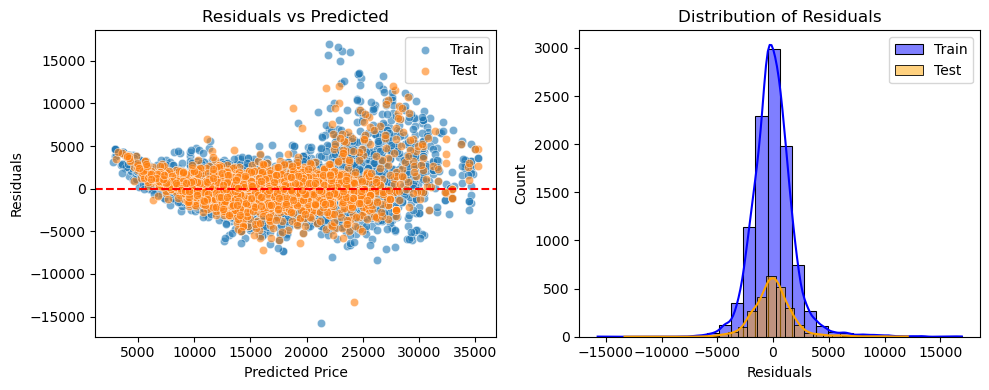

In [544]:
# Best alpha value

def find_lasso_best_alpha(X_train_scaled, X_test_scaled, y_train, alpha_range):
    
    lassocv, y_train_lasso_pred, y_test_lasso_pred, best_alpha, best_score_mae, best_score_mse = lassocv_model(X_train_scaled, X_test_scaled, y_train, alpha_range)

    print(f"Final LassoCV Model - Analyze Model Performance")
    lasso_results = analyze_model_performance(y_train, y_train_lasso_pred, y_test, y_test_lasso_pred)
    print(f"Final LassoCV Model - Plot of Residuals vs Predicted")
    plot_residuals_vs_predicted(y_train, y_train_lasso_pred, y_test, y_test_lasso_pred)

    # Best score (negative MSE)
    print(f"Best LassoCV Model Alpha: {best_alpha}")
    print(f"Best LassoCV Model Score (Negative MSE): {-best_score_mse} for Alpha {best_alpha}")
    print(f"Best LassoCV Model Score (Negative MAE): {-best_score_mae} for Alpha {best_alpha}")

    return lassocv, y_train_lasso_pred, y_test_lasso_pred, best_alpha, best_score_mae, best_score_mse

lassocv, y_train_lasso_pred, y_test_lasso_pred, best_alpha, best_score_mae, best_score_mse= find_lasso_best_alpha(X_train_scaled, X_test_scaled, y_train, narrow_alpha_range)



Finding the best alpha using lasso() tuning and min negative MSE


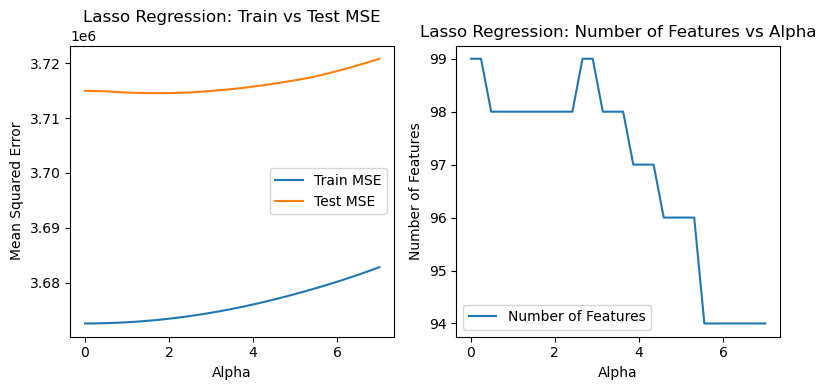

In [545]:
# Plot train and test scores against narrow alpha range, using lasso() tuning
print(f"Finding the best alpha using lasso() tuning and min negative MSE")
lasso, train_scores, test_scores, n_features = lasso_model_tuning(X_train_scaled, X_test_scaled, y_train, y_test, narrow_alpha_range)    
plot_lasso_alpha_vs_score(narrow_alpha_range, train_scores, test_scores, n_features)


In [548]:
# Best alpha value with lasso() manual loop

chosen_best_score = min(test_scores)
chosen_alpha_lasso_manual = narrow_alpha_range[test_scores.index(chosen_best_score)]
print(f"We use min Test MSE, to compare with LassoCV later which by default uses MSE")
print("Chosen alpha (Lasso):", chosen_alpha_lasso_manual)
print(f"Chosen alpha (Lasso) {chosen_alpha_lasso_manual} with minimum Test MSE : {min(test_scores)}")



We use min Test MSE, to compare with LassoCV later which by default uses MSE
Chosen alpha (Lasso): 1.6934482758620688
Chosen alpha (Lasso) 1.6934482758620688 with minimum Test MSE : 3714545.352458124


**It is very common to see different best α between LassoCV and your manual lasso() loop.**

**Why the difference happens**

- Search space resolution
    - LassoCV does an internal search over the alphas you give it.
    - Manual loop only checks the discrete values you list.
    - Example: If the true optimal alpha is 0.015, and you only test [0.01, 0.1, 1], your loop might pick 0.01. LassoCV might interpolate and find 0.015 or return something close like 1.42 if its internal scoring favors it.

- Cross-validation strategy
    - LassoCV uses its own internal CV splits (controlled by cv param, but defaults can differ).
    - Manual loop uses cross_val_score with a specific CV splitter (KFold, shuffle, random_state) or calculates values manually without CV split.
    - Even tiny differences in how folds are split can shift the chosen alpha.

- Randomness in splits / solver
    - Even with the same folds, Lasso is iterative and uses coordinate descent. If random_state isn’t fixed in both, results can drift slightly.

- Path vs fixed alphas
    - LassoCV traces along a regularization path (solution path for many alphas), and may “settle” on a point that minimizes CV-MSE along that path.
    - Manual loop just brute-forces and picks the discrete minimum.

Chosen alpha (using LassoCV): 1.0
Final Lasso Model - Analyze Model Performance


dataset         rmse          std           mse           var  \
0  Training  1916.453306  5964.193905  3.672793e+06  3.557161e+07   
1      Test  1927.344608  5953.809415  3.714657e+06  3.544785e+07   

           mae          mean      mape        r2  
0  1338.680721  16687.750807  0.088078  0.896739  
1  1325.591341  16695.843505  0.086195  0.895167

Final Top-N Lasso Model Coefficients by absolute value, with best score alpha:
---------------------------------------------------------------------------
Top 10 Lasso features and coefficients, with sign


feature         coef     coef_abs sign  dropped
12      make_model_Opel Corsa -1869.271825  1869.271825    -    False
4                       hp_kw  1777.459896  1777.459896    +    False
14    make_model_Renault Clio -1720.817702  1720.817702    -    False
11      make_model_Opel Astra -1259.253622  1259.253622    -    False
0                          km -1214.449694  1214.449694    -    False
2                         age -1198.522638  1198.522638    -    False
27        gearing_type_Manual  -809.744553   809.744553    -    False
15  make_model_Renault Espace   786.728041   786.728041    +    False
22                  type_Used  -708.489207   708.489207    -    False
10         make_model_Audi A3   677.351664   677.351664    +    False

---------------------------------------------------------------------------
Bottom 10 Lasso features and coefficients, with sign
---------------------------------------------------------------------------


feature       coef   coef_abs  \
92                safety_security_Adaptive headlights -17.616809  17.616809   
57           entertainment_media_Hands-free equipment  14.102644  14.102644   
38  comfort_convenience_Multi-function steering wheel  11.939804  11.939804   
89                       safety_security_Alarm system  -9.281042   9.281042   
58              entertainment_media_On-board computer  -7.925456   7.925456   
42                  comfort_convenience_Power windows  -6.366409   6.366409   
51  comfort_convenience_Electrically heated windsh...   3.135657   3.135657   
53  comfort_convenience_Electrically adjustable seats   3.006777   3.006777   
8                                           cons_comb  -0.000000   0.000000   
9                                  make_model_Audi A2   0.000000   0.000000   

   sign  dropped  
92    -    False  
57    +    False  
38    +    False  
89    -    False  
58    -    False  
42    -    False  
51    +    False  
53    +    False  
8     0     True  
9     0     True

---------------------------------------------------------------------------
Dropped Lasso features and coefficients
---------------------------------------------------------------------------


feature  coef  coef_abs sign  dropped
8           cons_comb  -0.0       0.0    0     True
9  make_model_Audi A2   0.0       0.0    0     True

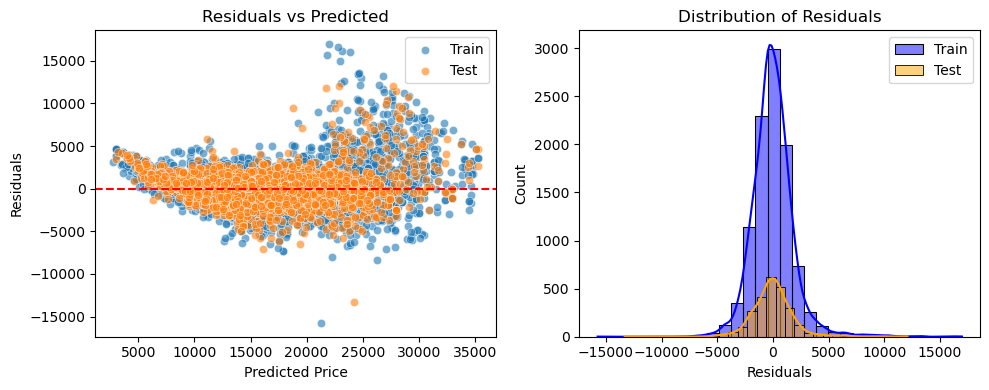

In [550]:
# Set best alpha for Lasso regression
best_lasso_alpha=[1.69]

# Fit the Lasso model on scaled training data
# Evaluate the Lasso model on the test data
best_lassocv, y_train_blasso_pred, y_test_blasso_pred, best_lasso_alpha, best_bscore_mae, best_bscore_mse = lassocv_model(X_train_scaled, X_test_scaled, y_train, alpha_range)

# Analyze model performance
print(f"Final Lasso Model - Analyze Model Performance")
lassocv_result = analyze_model_performance(y_train, y_train_blasso_pred, y_test, y_test_blasso_pred)
plot_residuals_vs_predicted(y_train, y_train_blasso_pred, y_test, y_test_blasso_pred)

# Get the coefficients of the fitted model
print(f"Final Top-N Lasso Model Coefficients by absolute value, with best score alpha:")

# Check the coefficients for each feature
feature_names = X_train.columns  # Get feature names from the original DataFrame

best_lassocv_coeff = pd.DataFrame({
                        'feature'  : feature_names,
                        'coef'     : best_lassocv.coef_,
                        'coef_abs' : np.abs(best_lassocv.coef_),
                        'sign'     : np.where(best_lassocv.coef_ > 0, "+",np.where(best_lassocv.coef_ < 0, "-","0")),
                        'dropped'  : np.where(best_lassocv.coef_ == 0, True, False)
}).sort_values(by='coef_abs', ascending=False)

# Print the top N coefficients by absolute value and sign
print("-" * 75)
print(f"Top 10 Lasso features and coefficients, with sign")
display(best_lassocv_coeff.head(10))
print("-" * 75)
print(f"Bottom 10 Lasso features and coefficients, with sign")
print("-" * 75)
display(best_lassocv_coeff.tail(10))
print("-" * 75)
print(f"Dropped Lasso features and coefficients")
print("-" * 75)
display(best_lassocv_coeff[best_lassocv_coeff['dropped']==True])


In [551]:
# Evaluate the Lasso model on the test data

print("Final Test Evaluation:")
print(f"R²: {r2_score(y_test, y_test_lasso_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_lasso_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_test_lasso_pred):.2f}")

Final Test Evaluation:
R²: 0.8952
MAE: 1325.05
MSE: 3714555.93


### **3.4 Regularisation Comparison & Analysis** <font color =red> [5 marks] </font>

#### **3.4.1** <font color =red> [2 marks] </font>
Compare the evaluation metrics for each model.

In [552]:
# Compare metrics for each model

def compare_combined_metrics():
    # Copy each model's result and add labels
    baseline_df = baseline_model_results.copy()
    baseline_df["Model"] = "Linear"
    baseline_df["Alpha"] = "-"

    ridge_df = ridge_results.copy()
    ridge_df["Model"] = "RidgeCV"
    ridge_df["Alpha"] = best_ridge_alpha

    lasso_df = lassocv_result.copy()
    lasso_df["Model"] = "LassoCV"
    lasso_df["Alpha"] = best_lasso_alpha

    # Combine into one table
    combined_df = pd.concat([baseline_df, ridge_df, lasso_df], ignore_index=True)

    # Reorder columns for readability
    cols = ["Model", "Alpha", "dataset", "rmse", "std", "mse", "var", "mae", "mean", "mape", "r2"]
    combined_df = combined_df[cols]

    return combined_df

combined_metrics = compare_combined_metrics()
display(combined_metrics)


Model       Alpha   dataset         rmse          std           mse  \
0   Linear           -  Training  1916.395641  5964.193905  3.672572e+06   
1   Linear           -      Test  1927.425144  5953.809415  3.714968e+06   
2  RidgeCV  110.689655  Training  1918.045885  5964.193905  3.678900e+06   
3  RidgeCV  110.689655      Test  1927.496661  5953.809415  3.715243e+06   
4  LassoCV         1.0  Training  1916.453306  5964.193905  3.672793e+06   
5  LassoCV         1.0      Test  1927.344608  5953.809415  3.714657e+06   

            var          mae          mean      mape        r2  
0  3.557161e+07  1339.295942  16687.750807  0.088136  0.896745  
1  3.544785e+07  1326.169542  16695.843505  0.086239  0.895158  
2  3.557161e+07  1337.148364  16687.750807  0.087747  0.896568  
3  3.544785e+07  1323.690419  16695.843505  0.085888  0.895150  
4  3.557161e+07  1338.680721  16687.750807  0.088078  0.896739  
5  3.544785e+07  1325.591341  16695.843505  0.086195  0.895167

**Interpretation strategy**
- If Linear Regression has the lowest test error → data is not very multicollinear, and regularization doesn’t add much.
- If Ridge improves test performance slightly but reduces variance → multicollinearity was an issue, Ridge is stabilizing coefficients.
- If Lasso performs better (or gives similar error with fewer features) → many coefficients were not important, and Lasso added interpretability by feature selection.
- **If all three are almost the same → dataset may be “well-behaved,” and regularization isn’t critical here.**

#### **3.4.2** <font color =red> [3 marks] </font>
Compare the coefficients for the three models.

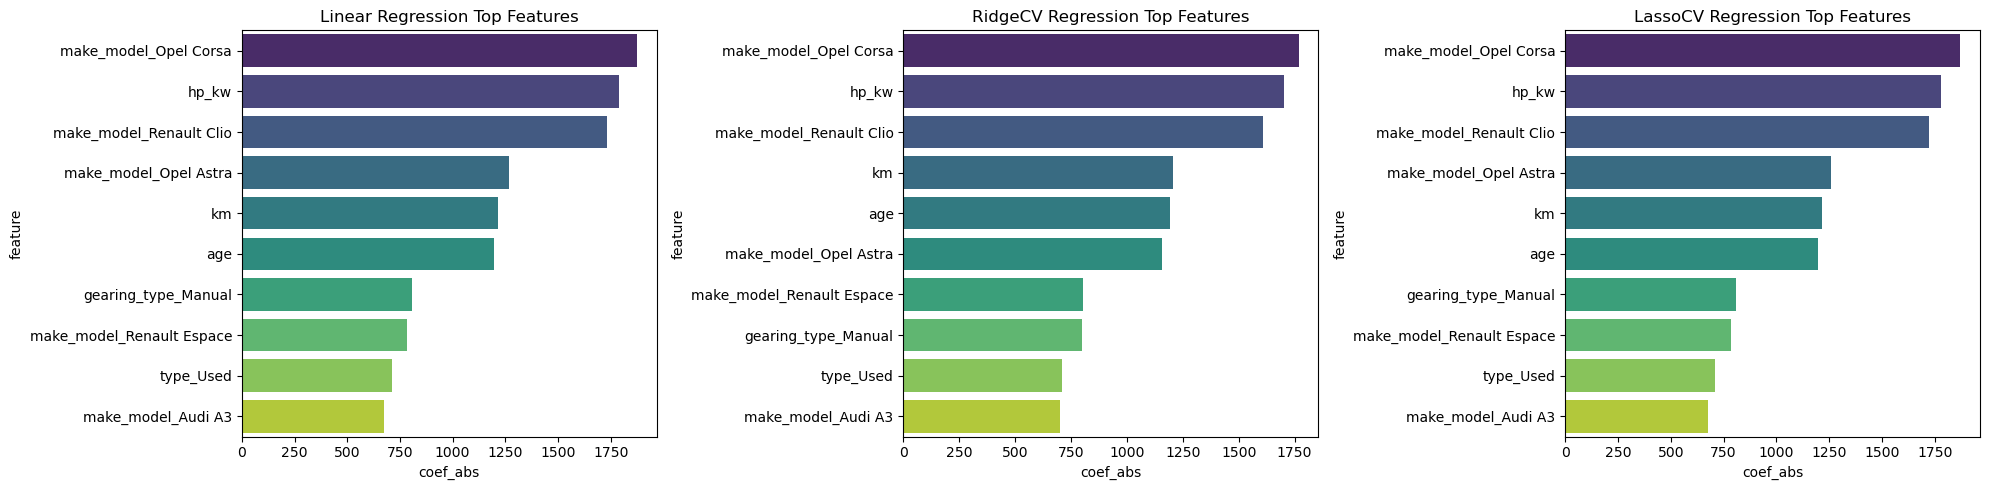

In [556]:
# Compare Top-10 parameters from the 3 models
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(data=lr_coeff.head(10), x='coef_abs', y='feature', palette='viridis')
plt.title("Linear Regression Top Features")
plt.subplot(1,3,2)
sns.barplot(data=ridge_coeff.head(10), x='coef_abs', y='feature', palette='viridis')
plt.title("RidgeCV Regression Top Features")
plt.subplot(1,3,3)
sns.barplot(data=best_lassocv_coeff.head(10), x='coef_abs', y='feature', palette='viridis')
plt.title("LassoCV Regression Top Features")
plt.tight_layout()
plt.show()

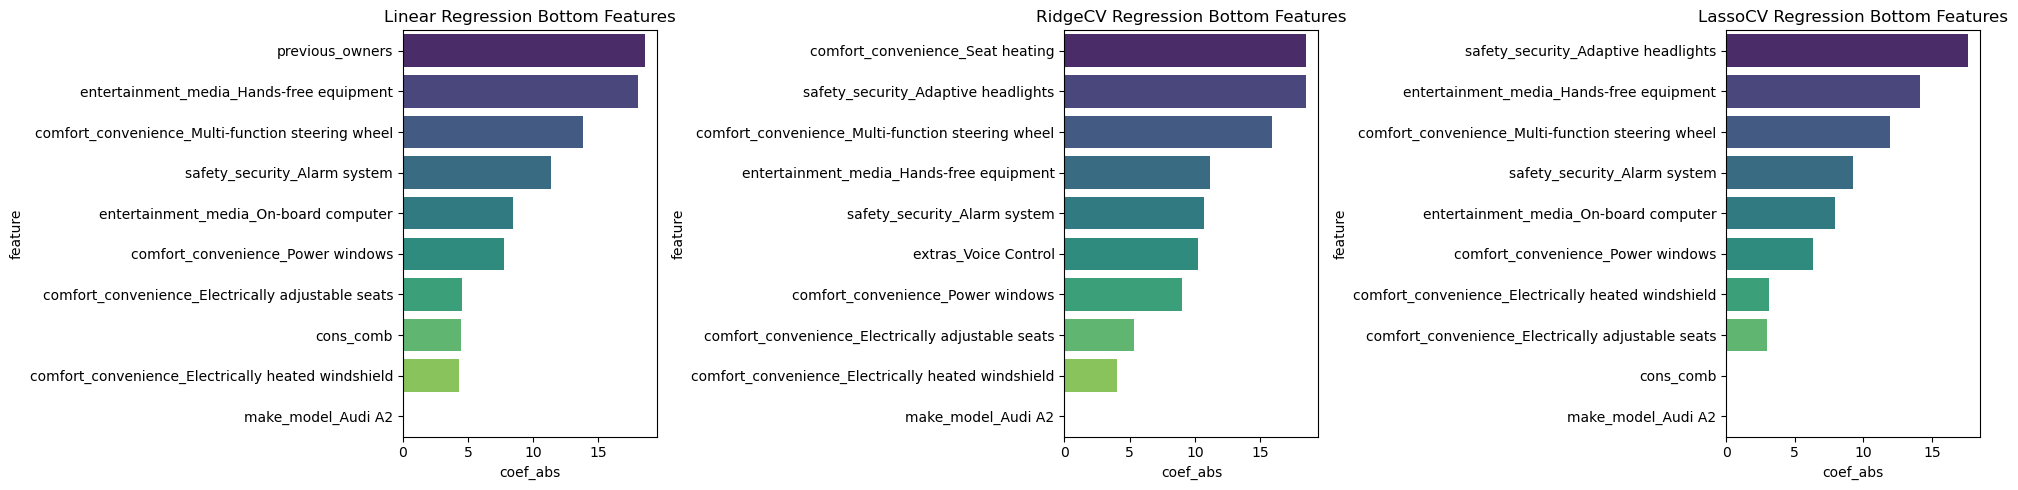

In [554]:
# Compare Bottom-10 parameters from the 3 models
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(data=lr_coeff.tail(10), x='coef_abs', y='feature', palette='viridis')
plt.title("Linear Regression Bottom Features")
plt.subplot(1,3,2)
sns.barplot(data=ridge_coeff.tail(10), x='coef_abs', y='feature', palette='viridis')
plt.title("RidgeCV Regression Bottom Features")
plt.subplot(1,3,3)
sns.barplot(data=best_lassocv_coeff.tail(10), x='coef_abs', y='feature', palette='viridis')
plt.title("LassoCV Regression Bottom Features")
plt.tight_layout()
plt.show()

Also visualise a few of the largest coefficients and the coefficients of features dropped by Lasso.

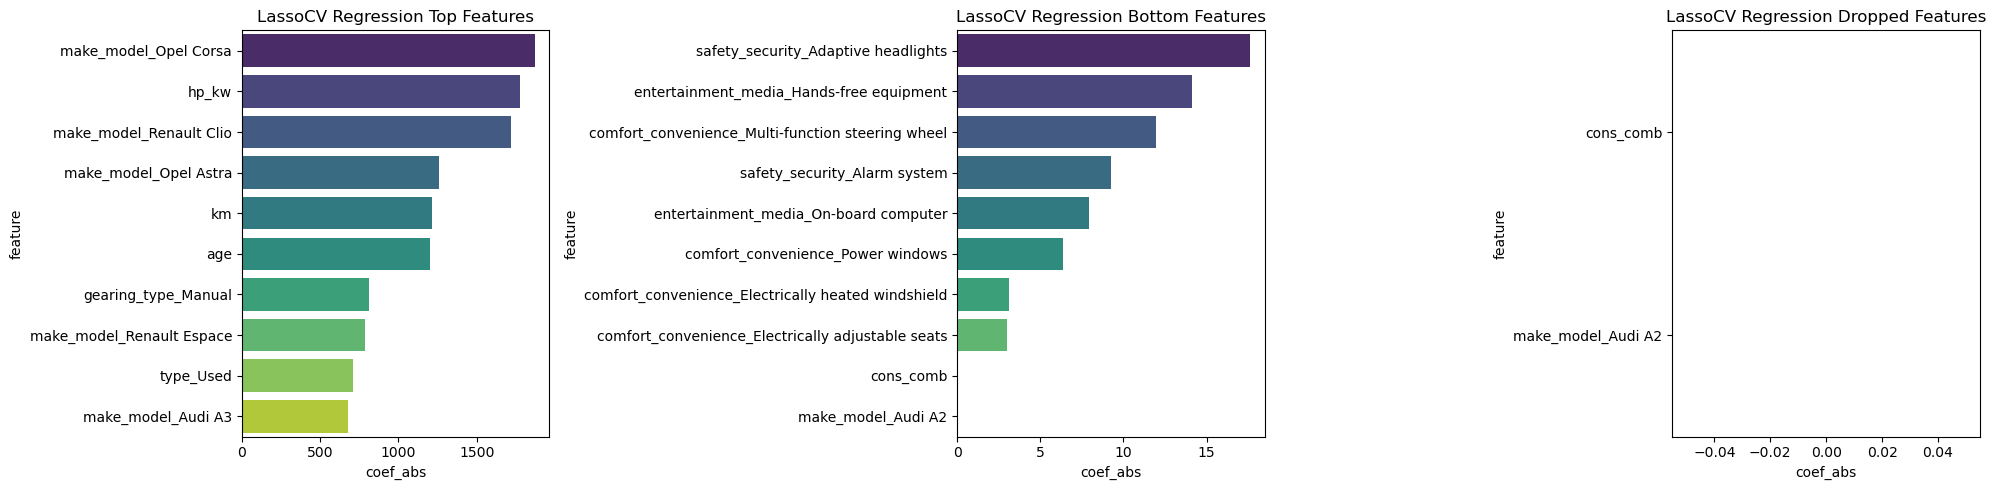

In [555]:
# Compare highest coefficients, lowest coeffs and coefficients of eliminated features
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.barplot(data=best_lassocv_coeff.head(10), x='coef_abs', y='feature', palette='viridis')
plt.title("LassoCV Regression Top Features")
plt.subplot(1,3,2)
sns.barplot(data=best_lassocv_coeff.tail(10), x='coef_abs', y='feature', palette='viridis')
plt.title("LassoCV Regression Bottom Features")
plt.subplot(1,3,3)
sns.barplot(data=best_lassocv_coeff[best_lassocv_coeff['coef_abs'] == 0], x='coef_abs', y='feature', palette='viridis')
plt.title("LassoCV Regression Dropped Features")
plt.tight_layout()
plt.show()

## **4 Conclusion & Key Takeaways**  <font color =red> [10 marks] </font>

What did you notice by performing regularisation? Did the model performance improve? If not, then why? Did you find overfitting or not? Was the data sufficent? Is a linear model sufficient?

#### **4.1 Conclude with outcomes and insights gained** <font color =red> [10 marks] </font>

#### Model Comparison Conclusion

| Model   | RMSE    | MSE       | MAE     | MAPE   | R²     |
| ------- | ------- | --------- | ------- | ------ | ------ |
| Linear  | 1927.43 | 3.715e+06 | 1326.17 | 0.0862 | 0.8952 |
| RidgeCV | 1927.69 | 3.716e+06 | 1323.56 | 0.0859 | 0.8951 |
| LassoCV | 1927.34 | 3.715e+06 | 1325.59 | 0.0862 | 0.8952 |

#### Observations

- All three models perform almost identically  
  - **RMSE ≈ 1927**  
  - **MAE ≈ 1325**  
  - **R² ≈ 0.895**  
  → Predictive accuracy is effectively the same.

##### RidgeCV
- Chose **α ≈ 110.7**  
- Reduced MAE slightly compared to baseline (**1323 vs 1326**).  
- Regularization didn’t change predictive performance much, but it **stabilizes coefficients** (reduces multicollinearity risk).

##### LassoCV
- Chose **α = 1.0**  
- Similar performance to baseline and Ridge.  
- Main benefit: **feature selection** (shrinks/zeroes out less important coefficients).

##### Baseline Linear Regression
- Already very strong (**R² ≈ 0.895**).  
- Regularization doesn’t improve error metrics, but might affect interpretability.

#### Model Performance Comparison Summary
- **Predictive power**: All three models are essentially equivalent in performance (differences are in the 3rd decimal place).  
- **RidgeCV**: Best if your goal is to handle multicollinearity and keep all features with shrunk coefficients.  
- **LassoCV**: Best if you want to simplify the model by feature selection (dropping irrelevant predictors).  
- **Baseline Linear Regression**: Already very good; regularization doesn’t add predictive accuracy but can help with coefficient stability (Ridge) or sparsity (Lasso).


## Predictors and Coefficients Comparison 

### Top Predictors Across Models

| Feature                     | Linear Regression | Ridge Regression | Lasso Regression | Interpretation                                     |
| --------------------------- | ----------------- | ---------------- | ---------------- | -------------------------------------------------- |
| make\_model\_Opel Corsa     | -1873.56          | -1767.95         | -1869.27         | Strong negative effect; very stable across models. |
| hp\_kw                      | +1786.34          | +1702.84         | +1777.46         | Strongest positive driver; Ridge shrinks slightly. |
| make\_model\_Renault Clio   | -1730.77          | -1609.58         | -1720.82         | Consistently strong negative effect.               |
| make\_model\_Opel Astra     | -1268.10          | -1155.89         | -1259.25         | Stable negative contribution.                      |
| km                          | -1215.94          | -1204.06         | -1214.45         | Mileage reduces price; very consistent.            |
| age                         | -1195.50          | -1191.24         | -1198.52         | Older cars worth less; unchanged across models.    |
| gearing\_type\_Manual       | -807.50           | -799.54          | -809.74          | Manual gearboxes lower price; effect stable.       |
| make\_model\_Renault Espace | +784.07           | +804.01          | +786.73          | Model-specific premium; Ridge inflates slightly.   |
| type\_Used                  | -710.31           | -709.05          | -708.49          | Used cars discounted; identical across models.     |
| make\_model\_Audi A3        | +676.51           | +701.38          | +677.35          | Positive Audi brand premium; stable.               |


### Minor / Negligible Predictors

| Feature                       | Linear Regression | Ridge Regression | Lasso Regression | Interpretation                                              |
| ----------------------------- | ----------------- | ---------------- | ---------------- | ----------------------------------------------------------- |
| previous\_owners              | -18.57            | –                | –                | Weak effect, not picked up in Ridge/Lasso.                  |
| Hands-free equipment          | +18.03            | +11.12           | +14.10           | Very small premium for feature.                             |
| Multi-function steering wheel | +13.83            | +15.91           | +11.94           | Consistently tiny effect across models.                     |
| Alarm system                  | -11.41            | -10.67           | -9.28            | Slight negative effect, unexpected.                         |
| On-board computer             | -8.43             | –                | -7.93            | Negligible impact, shrunk/dropped.                          |
| Power windows                 | -7.81             | -9.03            | -6.37            | Effectively irrelevant, but not dropped.                    |
| Electrically adjustable seats | +4.58             | +5.32            | +3.01            | Very small positive contribution.                           |
| cons\_comb                    | +4.47             | –                | 0.00 (dropped)   | Lasso eliminates it, shows redundancy with hp/displacement. |
| Heated windscreen             | +4.35             | +4.06            | +3.14            | Very minor effect.                                          |
| make\_model\_Audi A2          | \~0.00            | 0.00             | 0.00 (dropped)   | Irrelevant; Lasso drops completely.                         |
| Seat heating                  | –                 | -18.51           | –                | Ridge detects weak negative effect, others ignore.          |
| Adaptive headlights           | –                 | -18.51           | -17.62           | Tiny negative, only kept in Ridge/Lasso.                    |
| Voice Control                 | –                 | -10.20           | –                | Negligible; shrunk by Ridge, ignored elsewhere.             |


#### Consistency in Top Drivers

Across all three models, the same top features dominate price prediction:
- **hp_kw, km, age, Opel/Renault model dummies, gear type, car type**  
- Signs and magnitudes are stable (Ridge shrinks them slightly).

#### Regularization Impact
- **Ridge:** Shrinks extreme coefficients (Opel Corsa, Renault Clio, hp_kw) but keeps all features.  
- **Lasso:** Drops weak/irrelevant features (e.g., Audi A2, cons_comb → coefficients forced to 0).

#### Bottom Features Behavior
- **Linear Regression:** Leaves tiny but noisy coefficients (e.g., cons_comb small but nonzero).  
- **Ridge:** Shrinks these to small values but never to zero.  
- **Lasso:** Removes them entirely → cleaner model, better interpretability.

---
#### Summary
- **If interpretability and feature selection matter → Lasso wins.**  
- **If keeping all features while handling collinearity → Ridge is safer.**  
- **If you just want predictive accuracy → even baseline Linear is already strong.**

 


### Business Takeaway

**Key Price Drivers Are Clear and Stable**  
- Engine power (**hp_kw**), mileage (**km**), car age, and certain premium/budget models (Opel/Renault/Audi dummies) consistently dominate price prediction across all models.  
- This confirms where pricing focus should be: high-power, newer, low-mileage, premium models command higher prices, while older, used, and manual vehicles depress resale value.  

**Regularization Supports Decision-Making**  
- **Ridge regression** stabilizes coefficients, reducing risks of overestimating correlated features like engine size and weight.  
- **Lasso regression** identifies irrelevant or redundant features (e.g., `cons_comb`, `Audi A2`) that do not meaningfully influence pricing, simplifying analysis and reporting.  

**Actionable Insight for Pricing Strategy**  
- Focus marketing and sales efforts on features that consistently boost value (premium models, high engine power, low mileage).  
- Avoid overcomplicating pricing models with low-impact features; Lasso highlights which features can be safely ignored.  
- Use Ridge when all features matter but multicollinearity exists, ensuring stable coefficient estimates for decision-making.  

**Predictive Accuracy vs Interpretability**  
- All three models (**Linear, Ridge, Lasso**) predict price with near-identical accuracy (R² ≈ 0.895).  
- Decision-makers should choose model type based on business need:  
  - Simplified, interpretable pricing → **Lasso**  
  - Robust estimates including all features → **Ridge**  
  - Quick baseline insights → **Linear regression**

